# STEPS

1. Look at the big picture.
2. Get the data.
3. Discover and visualize the data to gain insights.
4. Prepare the data for Machine Learning algorithms.
5. Select a model and train it.
6. Fine-tune your model.
7. Present your solution.
8. Launch, monitor, and maintain your system


# 1- LOOK AT THE BIG PICTURE

### 1-1) FRAME THE PROBLEM

How does the company expect to use and benefit?

by allocating ressources, clustering ...

 Accurate insights are essential for effective policymaking and resource allocation

 Use machine learning to predict internet usage patterns

# My Objective

The objective of this competition is to develop a machine learning solution to predict fiber to the home (FTTH) internet uptake across various segments in Togo. 

# 2- GET THE DATA

In [1]:
#Get the data
import pandas as pd
df = pd.read_csv('Train.csv')

C:\Users\GODWIN\AppData\Local\Temp\ipykernel_12120\410259052.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
#get the test data
test = pd.read_csv('Test.csv')

In [3]:
ID_test = test.ID.values

# 3. Discover and visualize the data to gain insights.

In [2]:
#print the data
df.head()

,ID,TypeLogmt_1,TypeLogmt_2,TypeLogmt_3,H08_Impute,H09_Impute,TAILLE_MENAGE,H17A,H17B,H17C,...,.3991,.3992,.3993,.3994,.3995,.3996,.3997,.3998,.3999,Accès internet
0,ID_88M0FMHZAM,Logement semi-moderne,Plusieurs logement,Logement � un niveau (plain-pied),Electricit� (CEET) compteur dans la concession,Gaz,1.0,Non,Oui,Non,...,0.025202,0.235426,0.251377,0.125899,0.834979,1.055083,0.503122,0.761878,0.018388,0
1,ID_8BRUVGMYT4,Logement semi-moderne,Plusieurs logement,Logement � un niveau (plain-pied),Electricit� (CEET) compteur dans la concession,Gaz,4.0,Non,Oui,Non,...,0.417944,0.395539,0.243477,0.408191,0.278853,1.134487,0.165434,0.117637,0.214102,1
2,ID_BLWKMPQSDG,Logement moderne,Plusieurs logement,Logement � un niveau (plain-pied),Electricit� (CEET) compteur dans la concession,Charbon de bois,1.0,Non,Non,Non,...,0.059764,0.368242,0.255468,0.195145,0.976152,1.570176,0.669818,0.736460,0.037873,0
3,ID_5FF71INFJ2,Logement moderne,Plusieurs logement,Logement ? un niveau (plain-pied),Electricit? (CEET) compteur dans la concession,Gaz,4.0,Non,Non,Non,...,0.101552,0.474090,0.342558,0.228299,1.054081,1.805052,0.603918,0.746610,0.051638,1
4,ID_BL1YKKNQ4Y,Logement moderne,Plusieurs logement,Logement � un niveau (plain-pied),Electricit� (CEET) compteur dans la concession,Charbon de bois,1.0,Non,Non,Non,...,0.094498,0.410741,0.248533,0.222522,1.012230,1.725041,0.582654,0.770315,0.037564,0


In [40]:
df['H09_Impute']

0                    Gaz
1                    Gaz
2        Charbon de bois
3                    Gaz
4        Charbon de bois
              ...       
30553    Charbon de bois
30554    Charbon de bois
30555                Gaz
30556                Gaz
30557                Gaz
Name: H09_Impute, Length: 30558, dtype: object

In [218]:
test['H09_Impute']

0        Charbon de bois
1                    Gaz
2                    Gaz
3        Charbon de bois
4                    Gaz
              ...       
13092    Bois de chauffe
13093    Charbon de bois
13094    Charbon de bois
13095    Charbon de bois
13096    Bois de chauffe
Name: H09_Impute, Length: 13097, dtype: object

In [4]:
df.shape

(30558, 4043)

In [5]:
test.shape

(13097, 4042)

In [6]:
df.describe()

,TAILLE_MENAGE,,.1,.2,.3,.4,.5,.6,.7,.8,...,.3991,.3992,.3993,.3994,.3995,.3996,.3997,.3998,.3999,Accès internet
count,30558.000000,30558.000000,30558.000000,30558.000000,30558.000000,30558.000000,30558.000000,30558.000000,30558.000000,30558.000000,...,30558.000000,30558.000000,30558.000000,30558.000000,30558.000000,30558.000000,30558.000000,30558.000000,30558.000000,30558.000000
mean,4.475915,0.206314,0.528811,0.079791,0.314745,0.334572,0.479224,0.147230,0.250795,0.245560,...,0.179502,0.590012,0.372022,0.273604,0.966295,2.021615,0.665323,0.668420,0.107565,0.487859
std,2.934860,0.132264,0.297318,0.068620,0.211992,0.209262,0.287776,0.100688,0.171587,0.180839,...,0.171938,0.400610,0.258015,0.209405,0.598586,1.090736,0.438484,0.424855,0.104727,0.499861
min,1.000000,0.003657,0.013529,0.004931,0.000000,0.003523,0.024215,0.030554,0.020446,0.000000,...,0.003326,0.055927,0.010327,0.000387,0.004233,0.201520,0.010988,0.000710,0.005095,0.000000
25%,2.000000,0.115673,0.364513,0.038801,0.161350,0.209651,0.322518,0.081526,0.110830,0.098520,...,0.058356,0.328880,0.225890,0.138646,0.547731,1.203204,0.371847,0.405400,0.038204,0.000000
50%,4.000000,0.179487,0.532363,0.048690,0.333702,0.321623,0.416750,0.101263,0.168441,0.242293,...,0.103019,0.451248,0.294131,0.228299,1.012230,1.751470,0.652090,0.730052,0.056223,0.000000
75%,6.000000,0.266084,0.701194,0.091743,0.452244,0.454778,0.580604,0.171441,0.352279,0.357327,...,0.261872,0.654009,0.425018,0.396811,1.281234,2.395396,0.880445,0.864186,0.160363,1.000000
max,36.000000,0.714337,1.435041,0.410256,0.937503,1.010105,1.664593,0.637903,0.978567,0.811333,...,1.007384,2.376178,1.578969,1.134671,2.834302,6.501053,2.294453,1.828806,0.747823,1.000000


In [11]:
df['TAILLE_MENAGE'].describe()

count    30558.000000
mean         4.475915
std          2.934860
min          1.000000
25%          2.000000
50%          4.000000
75%          6.000000
max         36.000000
Name: TAILLE_MENAGE, dtype: float64

In [14]:
print(df['TAILLE_MENAGE'])

0        1.0
1        4.0
2        1.0
3        4.0
4        1.0
        ... 
30553    5.0
30554    1.0
30555    5.0
30556    1.0
30557    2.0
Name: TAILLE_MENAGE, Length: 30558, dtype: float64


 Analyser la distribution de la taille du ménage

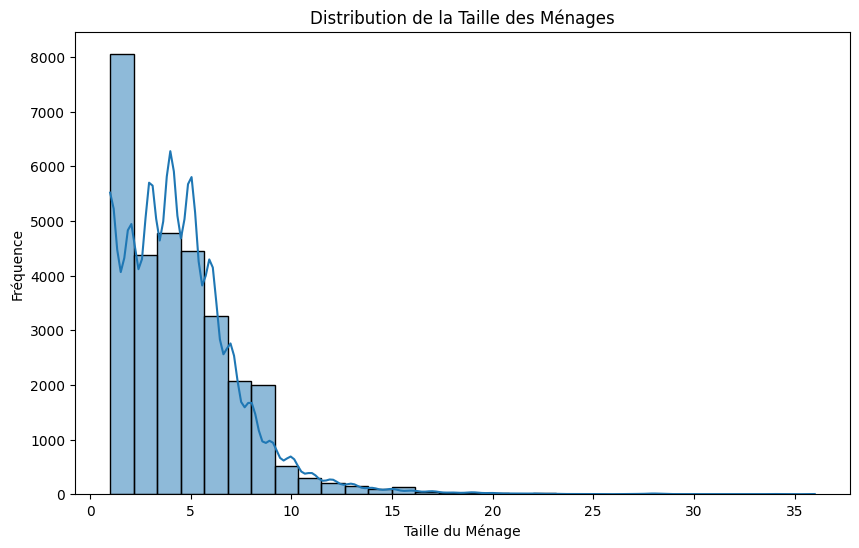

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualiser la distribution de la taille des ménages
plt.figure(figsize=(10, 6))
sns.histplot(df['TAILLE_MENAGE'], bins=30, kde=True)
plt.title('Distribution de la Taille des Ménages')
plt.xlabel('Taille du Ménage')
plt.ylabel('Fréquence')
plt.show()


###### Distribution de la taille de ménage
La majorité des ménages ont une taille relativement petite. La distribution est fortement asymétrique avec une longue queue à droite, ce qui signifie qu'il y a quelques ménages avec une taille très grande, mais ils sont peu fréquents

###### Médiane et mode
Le pic le plus élevé de la distribution se trouve autour des tailles de ménage de 1 à 3, indiquant que la majorité des ménages sont composés de 1 à 3 personnes. La médiane se situe probablement autour de 4 personnes, ce qui signifie que 50% des ménages ont une taille de 4 personnes ou moins.

###### Analyse
Comme les tailles de ménage plus petites sont plus courantes, il sera intéressant de voir comment l'accès à Internet varie avec différentes tailles de ménage.

Les données montrent que la plupart des ménages sont de petite taille. Si les ressources pour l'accès à Internet sont limitées, les politiques peuvent être orientées pour cibler ces ménages de petite à moyenne taille en priorité.

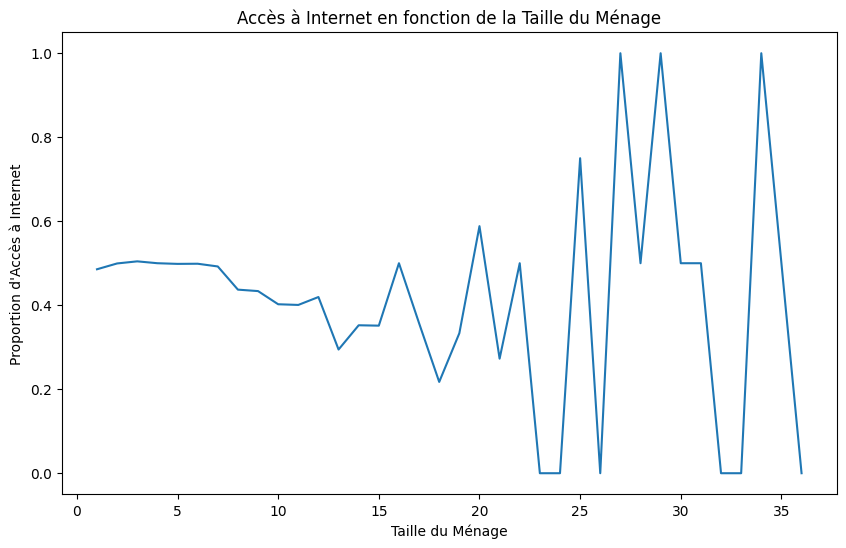

In [6]:
# Calculer la moyenne de l'accès à Internet en fonction de la taille du ménage
taille_menage_internet = df.groupby('TAILLE_MENAGE')['Accès internet'].mean()

# Visualiser cette relation
plt.figure(figsize=(10, 6))
sns.lineplot(x=taille_menage_internet.index, y=taille_menage_internet.values)
plt.title('Accès à Internet en fonction de la Taille du Ménage')
plt.xlabel('Taille du Ménage')
plt.ylabel('Proportion d\'Accès à Internet')
plt.show()

#### Tendance Générale :

La proportion d'accès à Internet reste relativement stable pour les tailles de ménage jusqu'à environ 10 personnes. Elle se situe autour de 0,4 à 0,6, ce qui signifie que 40% à 60% des ménages de cette taille ont accès à Internet.

#### Variabilité pour les Grandes Tailles de Ménage :

Au-delà de 10 personnes, la proportion d'accès à Internet devient très variable. Il y a des pics et des creux significatifs, ce qui peut être dû à un nombre plus faible d'observations pour ces tailles de ménage. Par exemple, les tailles de ménage autour de 20 à 25 montrent des proportions très élevées, alors qu'il y a des tailles pour lesquelles l'accès à Internet est nul.

#### Proportions Extrêmes :

Certaines tailles de ménage plus grandes montrent une proportion d'accès à Internet de 1 (100%) ou 0 (0%). Cela indique que tous les ménages de cette taille ont soit tous accès à Internet, soit aucun. Cela peut indiquer des anomalies ou des outliers dans les données.

Pour les tailles de ménage jusqu'à environ 10, la proportion d'accès à Internet est assez stable.La variabilité élevée pour les tailles de ménage plus grandes suggère que d'autres facteurs pourraient jouer un rôle plus important dans l'accès à Internet pour ces groupes; Pour les ménages de plus grande taille, une analyse plus approfondie des facteurs sous-jacents est nécessaire pour comprendre les raisons de la variabilité et cibler les interventions de manière plus efficace.

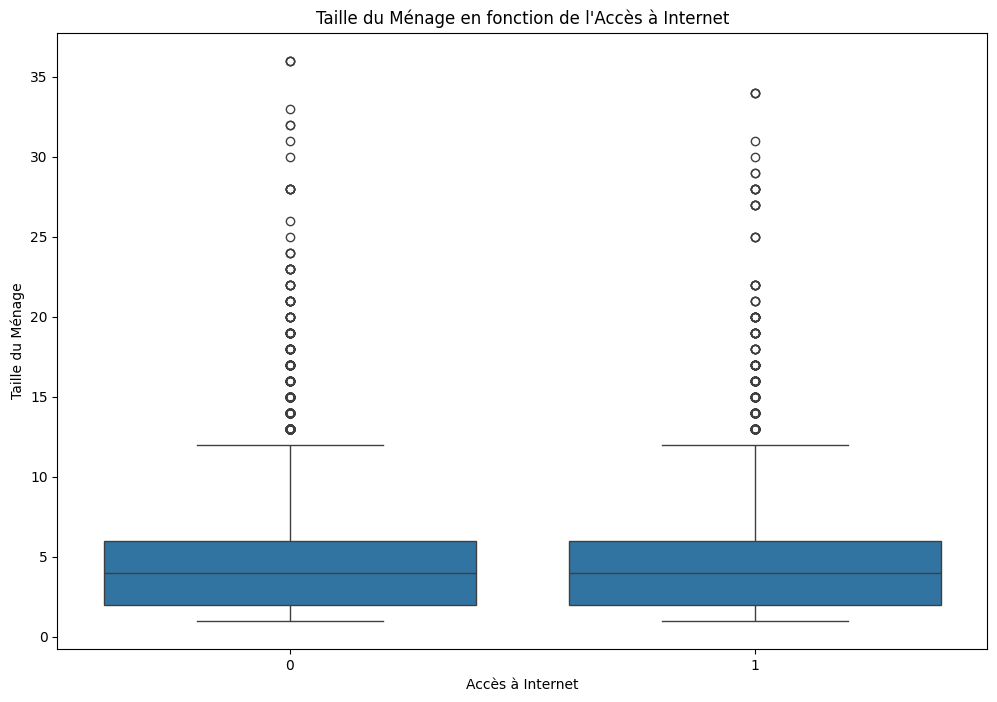

In [8]:
# Visualiser la relation avec un boxplot
plt.figure(figsize=(12, 8))
sns.boxplot(x='Accès internet', y='TAILLE_MENAGE', data=df)
plt.title('Taille du Ménage en fonction de l\'Accès à Internet')
plt.xlabel('Accès à Internet')
plt.ylabel('Taille du Ménage')
plt.show()


## 4. Prepare the data for Machine Learning algorithms.

In [15]:
df.dtypes

ID                 object
TypeLogmt_1        object
TypeLogmt_2        object
TypeLogmt_3        object
H08_Impute         object
                   ...   
 .3996            float64
 .3997            float64
 .3998            float64
 .3999            float64
Accès internet      int64
Length: 4043, dtype: object

In [3]:
object_columns = df.select_dtypes(include= object)
object_columns

,ID,TypeLogmt_1,TypeLogmt_2,TypeLogmt_3,H08_Impute,H09_Impute,H17A,H17B,H17C,H17D,...,H20D,H20E,H20Y,H21A,H21B,H21C,H21D,H21Y,Connexion,BoxLabel
0,ID_88M0FMHZAM,Logement semi-moderne,Plusieurs logement,Logement � un niveau (plain-pied),Electricit� (CEET) compteur dans la concession,Gaz,Non,Oui,Non,Non,...,Non,Non,Non,Non,Non,Non,Non,Oui,GVA,Box0
1,ID_8BRUVGMYT4,Logement semi-moderne,Plusieurs logement,Logement � un niveau (plain-pied),Electricit� (CEET) compteur dans la concession,Gaz,Non,Oui,Non,Non,...,Non,Oui,Non,Non,Non,Non,Non,Oui,GVA,Box0
2,ID_BLWKMPQSDG,Logement moderne,Plusieurs logement,Logement � un niveau (plain-pied),Electricit� (CEET) compteur dans la concession,Charbon de bois,Non,Non,Non,Non,...,Non,Non,Oui,Non,Non,Non,Non,Oui,GVA,Box0
3,ID_5FF71INFJ2,Logement moderne,Plusieurs logement,Logement ? un niveau (plain-pied),Electricit? (CEET) compteur dans la concession,Gaz,Non,Non,Non,Non,...,Non,Non,Non,Non,Non,Non,Non,Oui,Togocom,Box0
4,ID_BL1YKKNQ4Y,Logement moderne,Plusieurs logement,Logement � un niveau (plain-pied),Electricit� (CEET) compteur dans la concession,Charbon de bois,Non,Non,Non,Non,...,Non,Non,Oui,Non,Non,Non,Non,Oui,NaN,Box0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30553,ID_SLCZUGKFO5,Logement moderne,Logement unique,Logement ? un niveau (plain-pied),Electricit? (CEET) compteur dans la concession,Charbon de bois,Oui,Oui,Non,Non,...,Non,Oui,Non,Non,Non,Non,Non,Oui,Togocom,Box0
30554,ID_D2JVKCG1T8,Logement semi-moderne,Plusieurs logement,Logement ? un niveau (plain-pied),Electricit? (CEET) compteur dans la concession,Charbon de bois,Non,Non,Non,Non,...,Non,Non,Non,Non,Non,Non,Non,Oui,Togocom,Box0
30555,ID_KDYM8R7ZDH,Logement moderne,Plusieurs logement,Logement ? plusieurs niveaux (? ?tage),Electricit? (CEET) compteur dans la concession,Gaz,Non,Non,Non,Non,...,Non,Oui,Non,Non,Non,Non,Non,Oui,Togocom,Box0
30556,ID_KWQPPHS6CE,Logement moderne,Logement unique,Logement � un niveau (plain-pied),Electricit� (CEET) compteur dans la concession,Gaz,Non,Non,Non,Non,...,Non,Non,Non,Non,Non,Non,Non,Oui,GVA,Box0


In [4]:
object_columns_list = object_columns.columns.tolist()
object_columns_list

['ID',
 'TypeLogmt_1',
 'TypeLogmt_2',
 'TypeLogmt_3',
 'H08_Impute',
 'H09_Impute',
 'H17A',
 'H17B',
 'H17C',
 'H17D',
 'H17E',
 'H17F',
 'H17G',
 'H17H',
 'H17I',
 'H17J',
 'H17Y',
 'H18A',
 'H18B',
 'H18C',
 'H18D',
 'H18E',
 'H18F',
 'H18G',
 'H18H',
 'H18I',
 'H18J',
 'H18Y',
 'H20A',
 'H20B',
 'H20C',
 'H20D',
 'H20E',
 'H20Y',
 'H21A',
 'H21B',
 'H21C',
 'H21D',
 'H21Y',
 'Connexion',
 'BoxLabel']

In [17]:
df['TypeLogmt_1'].unique()

array(['Logement semi-moderne', 'Logement moderne', 'Autre',
       'Logement traditionnel'], dtype=object)

In [220]:
test['TypeLogmt_1'].unique()

array(['Logement moderne', 'Logement semi-moderne',
       'Logement traditionnel', 'Autre'], dtype=object)

In [18]:
df['TypeLogmt_2'].unique()

array(['Plusieurs logement', 'Logement unique', 'Autre'], dtype=object)

In [221]:
test['TypeLogmt_2'].unique()

array(['Logement unique', 'Plusieurs logement', 'Autre'], dtype=object)

In [19]:
df['TypeLogmt_3'].unique()

array(['Logement � un niveau (plain-pied)',
       'Logement ? un niveau (plain-pied)',
       'Logement � plusieurs niveaux (� �tage)',
       'Logement ? plusieurs niveaux (? ?tage)', 'Autre'], dtype=object)

In [224]:
test['TypeLogmt_3'].unique()

array(['Logement à plusieurs niveaux (à étage)',
       'Logement à un niveau (plain-pied)', 'Autre'], dtype=object)

In [7]:
df['TypeLogmt_3'] = df['TypeLogmt_3'].replace('Logement � un niveau (plain-pied)','Logement à un niveau (plain-pied)')
df['TypeLogmt_3'] = df['TypeLogmt_3'].replace('Logement ? un niveau (plain-pied)','Logement à un niveau (plain-pied)')
df['TypeLogmt_3'] = df['TypeLogmt_3'].replace('Logement � plusieurs niveaux (� �tage)','Logement à plusieurs niveaux (à étage)')
df['TypeLogmt_3'] = df['TypeLogmt_3'].replace('Logement ? plusieurs niveaux (? ?tage)','Logement à plusieurs niveaux (à étage)')


In [8]:
test['TypeLogmt_3'] = test['TypeLogmt_3'].replace('Logement � un niveau (plain-pied)','Logement à un niveau (plain-pied)')
test['TypeLogmt_3'] = test['TypeLogmt_3'].replace('Logement ? un niveau (plain-pied)','Logement à un niveau (plain-pied)')
test['TypeLogmt_3'] = test['TypeLogmt_3'].replace('Logement � plusieurs niveaux (� �tage)','Logement à plusieurs niveaux (à étage)')
test['TypeLogmt_3'] = test['TypeLogmt_3'].replace('Logement ? plusieurs niveaux (? ?tage)','Logement à plusieurs niveaux (à étage)')

In [21]:
df['TypeLogmt_3'].unique()

array(['Logement à un niveau (plain-pied)',
       'Logement à plusieurs niveaux (à étage)', 'Autre'], dtype=object)

In [13]:
df['H08_Impute'].unique()

array(['Electricit� (CEET) compteur dans la concession',
       'Electricit? (CEET) compteur dans la concession',
       'Electricit� (CEET) compteur hors concession', 'Lampion',
       'Torche/bougie', 'Energie solaire',
       'Electricit? (CEET) compteur hors concession',
       'C�blage d��lectricit� du voisinnage',
       'C?blage d??lectricit? du voisinnage', 'Autre (� pr�ciser)',
       'Autre (? pr?ciser)', 'Lampe � p�trole', 'Groupe �lectrog�ne',
       'Lampe ? p?trole', 'Lampe ? gaz', 'Groupe ?lectrog?ne',
       'Lampe � gaz'], dtype=object)

In [228]:
test['H08_Impute'].unique()

array(['Electricité (CEET) compteur hors concession',
       'Electricité (CEET) compteur dans la concession',
       'Cablage d électricité du voisinnage', 'Autre (à préciser)',
       'Torche/bougie', 'Lampe à pétrole', 'Lampion', 'Energie solaire',
       'Groupe électrogène', 'Lampe à gaz'], dtype=object)

In [6]:
df['H08_Impute'] = df['H08_Impute'].replace('Electricit� (CEET) compteur dans la concession','Electricité (CEET) compteur dans la concession')
df['H08_Impute'] = df['H08_Impute'].replace('Electricit? (CEET) compteur dans la concession','Electricité (CEET) compteur dans la concession')
df['H08_Impute'] = df['H08_Impute'].replace('Electricit� (CEET) compteur hors concession','Electricité (CEET) compteur hors concession')
df['H08_Impute'] = df['H08_Impute'].replace('Electricit? (CEET) compteur hors concession','Electricité (CEET) compteur hors concession')
df['H08_Impute'] = df['H08_Impute'].replace('C�blage d��lectricit� du voisinnage','Cablage d électricité du voisinnage')
df['H08_Impute'] = df['H08_Impute'].replace('C?blage d??lectricit? du voisinnage','Cablage d électricité du voisinnage')
df['H08_Impute'] = df['H08_Impute'].replace('Autre (� pr�ciser)','Autre (à préciser)')
df['H08_Impute'] = df['H08_Impute'].replace('Autre (? pr?ciser)','Autre (à préciser)')
df['H08_Impute'] = df['H08_Impute'].replace('Lampe � p�trole','Lampe à pétrole')
df['H08_Impute'] = df['H08_Impute'].replace('Lampe ? p?trole','Lampe à pétrole')
df['H08_Impute'] = df['H08_Impute'].replace('Groupe �lectrog�ne','Groupe électrogène')
df['H08_Impute'] = df['H08_Impute'].replace('Groupe ?lectrog?ne','Groupe électrogène')
df['H08_Impute'] = df['H08_Impute'].replace('Lampe ? gaz','Lampe à gaz')
df['H08_Impute'] = df['H08_Impute'].replace('Lampe � gaz','Lampe à gaz')



In [9]:
test['H08_Impute'] = test['H08_Impute'].replace('Electricit� (CEET) compteur dans la concession','Electricité (CEET) compteur dans la concession')
test['H08_Impute'] = test['H08_Impute'].replace('Electricit? (CEET) compteur dans la concession','Electricité (CEET) compteur dans la concession')
test['H08_Impute'] = test['H08_Impute'].replace('Electricit� (CEET) compteur hors concession','Electricité (CEET) compteur hors concession')
test['H08_Impute'] = test['H08_Impute'].replace('Electricit? (CEET) compteur hors concession','Electricité (CEET) compteur hors concession')
test['H08_Impute'] = test['H08_Impute'].replace('C�blage d��lectricit� du voisinnage','Cablage d électricité du voisinnage')
test['H08_Impute'] = test['H08_Impute'].replace('C?blage d??lectricit? du voisinnage','Cablage d électricité du voisinnage')
test['H08_Impute'] = test['H08_Impute'].replace('Autre (� pr�ciser)','Autre (à préciser)')
test['H08_Impute'] = test['H08_Impute'].replace('Autre (? pr?ciser)','Autre (à préciser)')
test['H08_Impute'] = test['H08_Impute'].replace('Lampe � p�trole','Lampe à pétrole')
test['H08_Impute'] = test['H08_Impute'].replace('Lampe ? p?trole','Lampe à pétrole')
test['H08_Impute'] = test['H08_Impute'].replace('Groupe �lectrog�ne','Groupe électrogène')
test['H08_Impute'] = test['H08_Impute'].replace('Groupe ?lectrog?ne','Groupe électrogène')
test['H08_Impute'] = test['H08_Impute'].replace('Lampe ? gaz','Lampe à gaz')
test['H08_Impute'] = test['H08_Impute'].replace('Lampe � gaz','Lampe à gaz')

In [7]:
df['H08_Impute'].unique()

array(['Electricité (CEET) compteur dans la concession',
       'Electricité (CEET) compteur hors concession', 'Lampion',
       'Torche/bougie', 'Energie solaire',
       'Cablage d électricité du voisinnage', 'Autre (à préciser)',
       'Lampe à pétrole', 'Groupe électrogène', 'Lampe à gaz'],
      dtype=object)

In [15]:
df['H09_Impute'].unique()

array(['Gaz', 'Charbon de bois', 'Ne cuisine pas', 'Bois de chauffe',
       '�lectricit�', 'P�trole', '?lectricit?', 'P?trole',
       'Autre (� pr�ciser)', 'R�sidus v�g�taux/sciure de bois',
       'Autre (? pr?ciser)', 'R?sidus v?g?taux/sciure de bois',
       'Bouse d�animaux'], dtype=object)

In [231]:
test['H09_Impute'].unique()

array(['Charbon de bois', 'Gaz', 'Bois de chauffe', 'Autre (à préciser)',
       'électricité', 'Ne cuisine pas', 'Pétrole',
       'Résidus végétaux/sciure de bois'], dtype=object)

In [10]:
df['H09_Impute'] = df['H09_Impute'].replace('�lectricit�','électricité')
df['H09_Impute'] = df['H09_Impute'].replace('?lectricit?','électricité')
df['H09_Impute'] = df['H09_Impute'].replace('P�trole','Pétrole')
df['H09_Impute'] = df['H09_Impute'].replace('P?trole','Pétrole')
df['H09_Impute'] = df['H09_Impute'].replace('Autre (� pr�ciser)','Autre (à préciser)')
df['H09_Impute'] = df['H09_Impute'].replace('Autre (? pr?ciser)','Autre (à préciser)')
df['H09_Impute'] = df['H09_Impute'].replace('R�sidus v�g�taux/sciure de bois','Résidus végétaux/sciure de bois')
df['H09_Impute'] = df['H09_Impute'].replace('R?sidus v?g?taux/sciure de bois','Résidus végétaux/sciure de bois')
df['H09_Impute'] = df['H09_Impute'].replace('Bouse d�animaux','Bouse d animaux')

In [11]:
test['H09_Impute'] = test['H09_Impute'].replace('�lectricit�','électricité')
test['H09_Impute'] = test['H09_Impute'].replace('?lectricit?','électricité')
test['H09_Impute'] = test['H09_Impute'].replace('P�trole','Pétrole')
test['H09_Impute'] = test['H09_Impute'].replace('P?trole','Pétrole')
test['H09_Impute'] = test['H09_Impute'].replace('Autre (� pr�ciser)','Autre (à préciser)')
test['H09_Impute'] = test['H09_Impute'].replace('Autre (? pr?ciser)','Autre (à préciser)')
test['H09_Impute'] = test['H09_Impute'].replace('R�sidus v�g�taux/sciure de bois','Résidus végétaux/sciure de bois')
test['H09_Impute'] = test['H09_Impute'].replace('R?sidus v?g?taux/sciure de bois','Résidus végétaux/sciure de bois')
test['H09_Impute'] = test['H09_Impute'].replace('Bouse d�animaux','Bouse d animaux')

In [28]:
df['H09_Impute'].unique()

array(['Gaz', 'Charbon de bois', 'Ne cuisine pas', 'Bois de chauffe',
       'électricité', 'Pétrole', 'Autre (à préciser)',
       'Résidus végétaux/sciure de bois', 'Bouse d animaux'], dtype=object)

In [29]:
df['H17A'].unique()

array(['Non', 'Oui'], dtype=object)

In [30]:
df['H17B'].unique()

array(['Oui', 'Non'], dtype=object)

In [62]:
df['H17C'].unique()

array([False,  True])

In [12]:
#remplacer les valeurs oui par True et les non par False
def transformer_oui_non(df):
    """
    Transforme les valeurs 'oui' et 'non' en True et False dans les colonnes dont les noms commencent par 'H' du DataFrame.

    :param df: DataFrame pandas
    :return: DataFrame avec les colonnes transformées
    """
    # Sélectionner les colonnes dont les noms commencent par 'H'
    colonnes_a_transformer = [col for col in df.columns if col.startswith('H')]
    
    # Transformer les valeurs 'oui' et 'non' en True et False dans ces colonnes
    df[colonnes_a_transformer] = df[colonnes_a_transformer].replace({'Oui': True, 'Non': False})
    
    return df

In [13]:
df = transformer_oui_non(df)

C:\Users\GODWIN\AppData\Local\Temp\ipykernel_12120\3732727285.py:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[colonnes_a_transformer] = df[colonnes_a_transformer].replace({'Oui': True, 'Non': False})


In [14]:
test = transformer_oui_non(test)

C:\Users\GODWIN\AppData\Local\Temp\ipykernel_12120\3732727285.py:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[colonnes_a_transformer] = df[colonnes_a_transformer].replace({'Oui': True, 'Non': False})


In [38]:
df.head()

,ID,TypeLogmt_1,TypeLogmt_2,TypeLogmt_3,H08_Impute,H09_Impute,TAILLE_MENAGE,H17A,H17B,H17C,...,.3991,.3992,.3993,.3994,.3995,.3996,.3997,.3998,.3999,Accès internet
0,ID_88M0FMHZAM,Logement semi-moderne,Plusieurs logement,Logement à un niveau (plain-pied),Electricité (CEET) compteur dans la concession,Gaz,1.0,False,True,False,...,0.025202,0.235426,0.251377,0.125899,0.834979,1.055083,0.503122,0.761878,0.018388,0
1,ID_8BRUVGMYT4,Logement semi-moderne,Plusieurs logement,Logement à un niveau (plain-pied),Electricité (CEET) compteur dans la concession,Gaz,4.0,False,True,False,...,0.417944,0.395539,0.243477,0.408191,0.278853,1.134487,0.165434,0.117637,0.214102,1
2,ID_BLWKMPQSDG,Logement moderne,Plusieurs logement,Logement à un niveau (plain-pied),Electricité (CEET) compteur dans la concession,Charbon de bois,1.0,False,False,False,...,0.059764,0.368242,0.255468,0.195145,0.976152,1.570176,0.669818,0.736460,0.037873,0
3,ID_5FF71INFJ2,Logement moderne,Plusieurs logement,Logement à un niveau (plain-pied),Electricité (CEET) compteur dans la concession,Gaz,4.0,False,False,False,...,0.101552,0.474090,0.342558,0.228299,1.054081,1.805052,0.603918,0.746610,0.051638,1
4,ID_BL1YKKNQ4Y,Logement moderne,Plusieurs logement,Logement à un niveau (plain-pied),Electricité (CEET) compteur dans la concession,Charbon de bois,1.0,False,False,False,...,0.094498,0.410741,0.248533,0.222522,1.012230,1.725041,0.582654,0.770315,0.037564,0


In [39]:
df['H17A'].unique()

array([False,  True])

In [233]:
test['H17A'].unique()

array([False,  True])

In [61]:
df['H17A'].dtype

dtype('bool')

In [40]:
df['Connexion'].unique()

array(['GVA', 'Togocom', nan], dtype=object)

In [236]:
test['Connexion'].unique()

array(['Togocom', 'GVA', 'inconnu'], dtype=object)

In [19]:
df['Connexion'].isna().sum()


10508

In [15]:
df['Connexion'] = df['Connexion'].fillna('inconnu')

In [16]:
test['Connexion'] = test['Connexion'].fillna('inconnu')

In [45]:
df['Connexion'].unique()

array(['GVA', 'Togocom', 'inconnu'], dtype=object)

In [55]:
df['Connexion'].isna().sum()

0

In [46]:
df['BoxLabel'].unique()

array(['Box0'], dtype=object)

In [17]:
test= test.drop(['BoxLabel'], axis=1)

In [18]:
df= df.drop(['BoxLabel'], axis=1)
df

,ID,TypeLogmt_1,TypeLogmt_2,TypeLogmt_3,H08_Impute,H09_Impute,TAILLE_MENAGE,H17A,H17B,H17C,...,.3991,.3992,.3993,.3994,.3995,.3996,.3997,.3998,.3999,Accès internet
0,ID_88M0FMHZAM,Logement semi-moderne,Plusieurs logement,Logement à un niveau (plain-pied),Electricité (CEET) compteur dans la concession,Gaz,1.0,False,True,False,...,0.025202,0.235426,0.251377,0.125899,0.834979,1.055083,0.503122,0.761878,0.018388,0
1,ID_8BRUVGMYT4,Logement semi-moderne,Plusieurs logement,Logement à un niveau (plain-pied),Electricité (CEET) compteur dans la concession,Gaz,4.0,False,True,False,...,0.417944,0.395539,0.243477,0.408191,0.278853,1.134487,0.165434,0.117637,0.214102,1
2,ID_BLWKMPQSDG,Logement moderne,Plusieurs logement,Logement à un niveau (plain-pied),Electricité (CEET) compteur dans la concession,Charbon de bois,1.0,False,False,False,...,0.059764,0.368242,0.255468,0.195145,0.976152,1.570176,0.669818,0.736460,0.037873,0
3,ID_5FF71INFJ2,Logement moderne,Plusieurs logement,Logement à un niveau (plain-pied),Electricité (CEET) compteur dans la concession,Gaz,4.0,False,False,False,...,0.101552,0.474090,0.342558,0.228299,1.054081,1.805052,0.603918,0.746610,0.051638,1
4,ID_BL1YKKNQ4Y,Logement moderne,Plusieurs logement,Logement à un niveau (plain-pied),Electricité (CEET) compteur dans la concession,Charbon de bois,1.0,False,False,False,...,0.094498,0.410741,0.248533,0.222522,1.012230,1.725041,0.582654,0.770315,0.037564,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30553,ID_SLCZUGKFO5,Logement moderne,Logement unique,Logement à un niveau (plain-pied),Electricité (CEET) compteur dans la concession,Charbon de bois,5.0,True,True,False,...,0.025202,0.235426,0.251377,0.125899,0.834979,1.055083,0.503122,0.761878,0.018388,1
30554,ID_D2JVKCG1T8,Logement semi-moderne,Plusieurs logement,Logement à un niveau (plain-pied),Electricité (CEET) compteur dans la concession,Charbon de bois,1.0,False,False,False,...,0.083871,0.377852,0.220977,0.206014,1.047449,1.751470,0.593037,0.717373,0.037380,1
30555,ID_KDYM8R7ZDH,Logement moderne,Plusieurs logement,Logement à plusieurs niveaux (à étage),Electricité (CEET) compteur dans la concession,Gaz,5.0,False,False,False,...,0.094498,0.410741,0.248533,0.222522,1.012230,1.725041,0.582654,0.770315,0.037564,0
30556,ID_KWQPPHS6CE,Logement moderne,Logement unique,Logement à un niveau (plain-pied),Electricité (CEET) compteur dans la concession,Gaz,1.0,False,False,False,...,0.437088,1.083136,0.729239,0.608099,1.622408,3.189725,1.025956,1.290243,0.183807,0


In [19]:
df.shape

(30558, 4042)

In [20]:
test.shape

(13097, 4041)

In [56]:
df.isnull().sum()

ID                0
TypeLogmt_1       0
TypeLogmt_2       0
TypeLogmt_3       0
H08_Impute        0
                 ..
 .3996            0
 .3997            0
 .3998            0
 .3999            0
Accès internet    0
Length: 4042, dtype: int64

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30558 entries, 0 to 30557
Columns: 4042 entries, ID to Accès internet
dtypes: bool(33), float64(4001), int64(1), object(7)
memory usage: 935.6+ MB


les float, il faut regarder si on doit standardiser ou faire minmax.
les booléens sont déja traités.
le int doit ètre le target.
l'object on doit revoir c'est quoi.

In [21]:
test = test.drop(columns=['ID'])

In [22]:
df = df.drop(columns=['ID'])
df

,TypeLogmt_1,TypeLogmt_2,TypeLogmt_3,H08_Impute,H09_Impute,TAILLE_MENAGE,H17A,H17B,H17C,H17D,...,.3991,.3992,.3993,.3994,.3995,.3996,.3997,.3998,.3999,Accès internet
0,Logement semi-moderne,Plusieurs logement,Logement à un niveau (plain-pied),Electricité (CEET) compteur dans la concession,Gaz,1.0,False,True,False,False,...,0.025202,0.235426,0.251377,0.125899,0.834979,1.055083,0.503122,0.761878,0.018388,0
1,Logement semi-moderne,Plusieurs logement,Logement à un niveau (plain-pied),Electricité (CEET) compteur dans la concession,Gaz,4.0,False,True,False,False,...,0.417944,0.395539,0.243477,0.408191,0.278853,1.134487,0.165434,0.117637,0.214102,1
2,Logement moderne,Plusieurs logement,Logement à un niveau (plain-pied),Electricité (CEET) compteur dans la concession,Charbon de bois,1.0,False,False,False,False,...,0.059764,0.368242,0.255468,0.195145,0.976152,1.570176,0.669818,0.736460,0.037873,0
3,Logement moderne,Plusieurs logement,Logement à un niveau (plain-pied),Electricité (CEET) compteur dans la concession,Gaz,4.0,False,False,False,False,...,0.101552,0.474090,0.342558,0.228299,1.054081,1.805052,0.603918,0.746610,0.051638,1
4,Logement moderne,Plusieurs logement,Logement à un niveau (plain-pied),Electricité (CEET) compteur dans la concession,Charbon de bois,1.0,False,False,False,False,...,0.094498,0.410741,0.248533,0.222522,1.012230,1.725041,0.582654,0.770315,0.037564,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30553,Logement moderne,Logement unique,Logement à un niveau (plain-pied),Electricité (CEET) compteur dans la concession,Charbon de bois,5.0,True,True,False,False,...,0.025202,0.235426,0.251377,0.125899,0.834979,1.055083,0.503122,0.761878,0.018388,1
30554,Logement semi-moderne,Plusieurs logement,Logement à un niveau (plain-pied),Electricité (CEET) compteur dans la concession,Charbon de bois,1.0,False,False,False,False,...,0.083871,0.377852,0.220977,0.206014,1.047449,1.751470,0.593037,0.717373,0.037380,1
30555,Logement moderne,Plusieurs logement,Logement à plusieurs niveaux (à étage),Electricité (CEET) compteur dans la concession,Gaz,5.0,False,False,False,False,...,0.094498,0.410741,0.248533,0.222522,1.012230,1.725041,0.582654,0.770315,0.037564,0
30556,Logement moderne,Logement unique,Logement à un niveau (plain-pied),Electricité (CEET) compteur dans la concession,Gaz,1.0,False,False,False,False,...,0.437088,1.083136,0.729239,0.608099,1.622408,3.189725,1.025956,1.290243,0.183807,0


In [23]:
df.shape

(30558, 4041)

In [243]:
test.head()

,TypeLogmt_1,TypeLogmt_2,TypeLogmt_3,H08_Impute,H09_Impute,TAILLE_MENAGE,H17A,H17B,H17C,H17D,...,.3990,.3991,.3992,.3993,.3994,.3995,.3996,.3997,.3998,.3999
0,Logement moderne,Logement unique,Logement à plusieurs niveaux (à étage),Electricité (CEET) compteur hors concession,Charbon de bois,5.0,False,True,False,False,...,0.215417,0.062298,0.328880,0.193603,0.123900,0.773756,1.464494,0.647847,0.448600,0.047404
1,Logement moderne,Plusieurs logement,Logement à un niveau (plain-pied),Electricité (CEET) compteur dans la concession,Gaz,9.0,False,True,False,False,...,0.023053,0.029340,0.204032,0.067190,0.004446,0.034146,0.841245,0.036763,0.003054,0.027603
2,Logement semi-moderne,Plusieurs logement,Logement à un niveau (plain-pied),Electricité (CEET) compteur dans la concession,Gaz,1.0,False,False,False,False,...,0.349223,0.096777,0.402451,0.234141,0.230451,1.077133,1.731721,0.600732,0.784672,0.037761
3,Logement semi-moderne,Logement unique,Logement à un niveau (plain-pied),Electricité (CEET) compteur dans la concession,Charbon de bois,3.0,False,False,False,False,...,0.506753,0.151268,0.624592,0.360747,0.351187,1.323039,2.344100,0.900833,0.990587,0.085504
4,Logement semi-moderne,Plusieurs logement,Logement à un niveau (plain-pied),Electricité (CEET) compteur dans la concession,Gaz,3.0,False,False,True,False,...,0.401449,0.127706,0.516138,0.312065,0.277865,1.163575,1.976314,0.677894,0.851412,0.060335


In [24]:
df.rename(columns={'Accès internet':'Target'},inplace=True)
df.head()

,TypeLogmt_1,TypeLogmt_2,TypeLogmt_3,H08_Impute,H09_Impute,TAILLE_MENAGE,H17A,H17B,H17C,H17D,...,.3991,.3992,.3993,.3994,.3995,.3996,.3997,.3998,.3999,Target
0,Logement semi-moderne,Plusieurs logement,Logement à un niveau (plain-pied),Electricité (CEET) compteur dans la concession,Gaz,1.0,False,True,False,False,...,0.025202,0.235426,0.251377,0.125899,0.834979,1.055083,0.503122,0.761878,0.018388,0
1,Logement semi-moderne,Plusieurs logement,Logement à un niveau (plain-pied),Electricité (CEET) compteur dans la concession,Gaz,4.0,False,True,False,False,...,0.417944,0.395539,0.243477,0.408191,0.278853,1.134487,0.165434,0.117637,0.214102,1
2,Logement moderne,Plusieurs logement,Logement à un niveau (plain-pied),Electricité (CEET) compteur dans la concession,Charbon de bois,1.0,False,False,False,False,...,0.059764,0.368242,0.255468,0.195145,0.976152,1.570176,0.669818,0.736460,0.037873,0
3,Logement moderne,Plusieurs logement,Logement à un niveau (plain-pied),Electricité (CEET) compteur dans la concession,Gaz,4.0,False,False,False,False,...,0.101552,0.474090,0.342558,0.228299,1.054081,1.805052,0.603918,0.746610,0.051638,1
4,Logement moderne,Plusieurs logement,Logement à un niveau (plain-pied),Electricité (CEET) compteur dans la concession,Charbon de bois,1.0,False,False,False,False,...,0.094498,0.410741,0.248533,0.222522,1.012230,1.725041,0.582654,0.770315,0.037564,0


In [25]:
object_columns.columns

Index(['ID', 'TypeLogmt_1', 'TypeLogmt_2', 'TypeLogmt_3', 'H08_Impute',
       'H09_Impute', 'H17A', 'H17B', 'H17C', 'H17D', 'H17E', 'H17F', 'H17G',
       'H17H', 'H17I', 'H17J', 'H17Y', 'H18A', 'H18B', 'H18C', 'H18D', 'H18E',
       'H18F', 'H18G', 'H18H', 'H18I', 'H18J', 'H18Y', 'H20A', 'H20B', 'H20C',
       'H20D', 'H20E', 'H20Y', 'H21A', 'H21B', 'H21C', 'H21D', 'H21Y',
       'Connexion', 'BoxLabel'],
      dtype='object')

In [15]:
df_object = df.select_dtypes(include='object').columns
df_object

Index(['TypeLogmt_1', 'TypeLogmt_2', 'TypeLogmt_3', 'H08_Impute', 'H09_Impute',
       'Connexion'],
      dtype='object')

In [25]:
# Création de l'instance OneHotEncoder
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)

In [26]:

# Ajustement et transformation des données
encoded_array_fit = encoder.fit(df[['TypeLogmt_1', 'TypeLogmt_2', 'TypeLogmt_3', 'H08_Impute', 'H09_Impute','Connexion']])
encoded_array_transform = encoded_array_fit.transform(df[['TypeLogmt_1', 'TypeLogmt_2', 'TypeLogmt_3', 'H08_Impute', 'H09_Impute','Connexion']])
features_names = encoder.get_feature_names_out(['TypeLogmt_1', 'TypeLogmt_2', 'TypeLogmt_3', 'H08_Impute', 'H09_Impute','Connexion'])
df_OneHot = pd.DataFrame(encoded_array_transform, columns = features_names)
df_OneHot

,TypeLogmt_1_Autre,TypeLogmt_1_Logement moderne,TypeLogmt_1_Logement semi-moderne,TypeLogmt_1_Logement traditionnel,TypeLogmt_2_Autre,TypeLogmt_2_Logement unique,TypeLogmt_2_Plusieurs logement,TypeLogmt_3_Autre,TypeLogmt_3_Logement à plusieurs niveaux (à étage),TypeLogmt_3_Logement à un niveau (plain-pied),...,H09_Impute_Bouse d animaux,H09_Impute_Charbon de bois,H09_Impute_Gaz,H09_Impute_Ne cuisine pas,H09_Impute_Pétrole,H09_Impute_Résidus végétaux/sciure de bois,H09_Impute_électricité,Connexion_GVA,Connexion_Togocom,Connexion_inconnu
0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30553,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
30554,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
30555,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
30556,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [27]:
encoded_array_transform = encoded_array_fit.transform(test[['TypeLogmt_1', 'TypeLogmt_2', 'TypeLogmt_3', 'H08_Impute', 'H09_Impute','Connexion']])
features_names = encoder.get_feature_names_out(['TypeLogmt_1', 'TypeLogmt_2', 'TypeLogmt_3', 'H08_Impute', 'H09_Impute','Connexion'])
test_OneHot = pd.DataFrame(encoded_array_transform, columns = features_names)
test_OneHot

,TypeLogmt_1_Autre,TypeLogmt_1_Logement moderne,TypeLogmt_1_Logement semi-moderne,TypeLogmt_1_Logement traditionnel,TypeLogmt_2_Autre,TypeLogmt_2_Logement unique,TypeLogmt_2_Plusieurs logement,TypeLogmt_3_Autre,TypeLogmt_3_Logement à plusieurs niveaux (à étage),TypeLogmt_3_Logement à un niveau (plain-pied),...,H09_Impute_Bouse d animaux,H09_Impute_Charbon de bois,H09_Impute_Gaz,H09_Impute_Ne cuisine pas,H09_Impute_Pétrole,H09_Impute_Résidus végétaux/sciure de bois,H09_Impute_électricité,Connexion_GVA,Connexion_Togocom,Connexion_inconnu
0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13092,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
13093,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
13094,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
13095,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [28]:
#concatener l'ancien dataframe et ce nouveau 
df_encoded = pd.concat([df.drop(['TypeLogmt_1', 'TypeLogmt_2', 'TypeLogmt_3', 'H08_Impute', 'H09_Impute','Connexion'], axis=1),df_OneHot],axis=1)


In [29]:
#concatener l'ancien dataframe et ce nouveau 
test_encoded = pd.concat([test.drop(['TypeLogmt_1', 'TypeLogmt_2', 'TypeLogmt_3', 'H08_Impute', 'H09_Impute','Connexion'], axis=1),test_OneHot],axis=1)


In [30]:
df_encoded.shape


(30558, 4067)

In [31]:
test_encoded.shape

(13097, 4066)

In [84]:

df_encoded.columns

Index(['TAILLE_MENAGE', 'H17A', 'H17B', 'H17C', 'H17D', 'H17E', 'H17F', 'H17G',
       'H17H', 'H17I',
       ...
       'H09_Impute_Bouse d animaux', 'H09_Impute_Charbon de bois',
       'H09_Impute_Gaz', 'H09_Impute_Ne cuisine pas', 'H09_Impute_Pétrole',
       'H09_Impute_Résidus végétaux/sciure de bois', 'H09_Impute_électricité',
       'Connexion_GVA', 'Connexion_Togocom', 'Connexion_inconnu'],
      dtype='object', length=4066)

In [82]:
df_encoded.shape

(30558, 4066)

In [80]:
df_encoded['Target']

0        0
1        1
2        0
3        1
4        0
        ..
30553    1
30554    1
30555    0
30556    0
30557    1
Name: Target, Length: 30558, dtype: int64

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcul des corrélations pour les variables numériques
correlation_matrix = df_encoded.corr()


In [135]:

# Filtrer les corrélations par rapport à la variable cible (l'accès à Internet)
correlation_target = correlation_matrix["Target"].sort_values(ascending=False)

# Afficher les corrélations les plus élevées
correlation_target.head(30)

Target                                                       1.000000
Connexion_GVA                                                0.371716
Connexion_Togocom                                            0.343135
H08_Impute_Electricité (CEET) compteur dans la concession    0.145575
H18E                                                         0.144228
H09_Impute_Gaz                                               0.137062
H18C                                                         0.130158
H18D                                                         0.126969
 .3140                                                       0.126012
H18H                                                         0.124998
 .1862                                                       0.123794
H17F                                                         0.121086
TypeLogmt_1_Logement moderne                                 0.104220
H18A                                                         0.092293
H20C                

##### GVA TOGO, est le leader de l'Internet fixe Très Haut Débit au Togo
Depuis 2018, GVA Togo a déployé son réseau fibre optique dans tous les quartiers de la capitale Lomé et sa grande banlieue, couvrant ainsi près de 400 000 foyers et entreprises togolaises.

In [255]:
# Sélectionner les 30 variables les plus corrélées
top_1500_features = correlation_target.index[:1500]
print(f'Les 1500 variables les plus corrélées sont : {top_1500_features}')

Les 1000 variables les plus corrélées sont : Index(['Target', 'Connexion_GVA', 'Connexion_Togocom',
       'H08_Impute_Electricité (CEET) compteur dans la concession', 'H18E',
       'H09_Impute_Gaz', 'H18C', 'H18D', ' .3140', 'H18H',
       ...
       ' .800', ' .2682', ' .3274', ' .2759', ' .3007', ' .2584', ' .2424',
       ' .2364', ' .282', ' .2593'],
      dtype='object', length=500)


In [91]:
# Sélectionner les 100 variables les plus corrélées positivement
top_positive_correlations = correlation_target.head(100).index.tolist()

# Sélectionner les 1000 variables les plus corrélées négativement
top_negative_correlations = correlation_target.tail(100).index.tolist()

In [92]:
# Combiner les deux listes de variables sélectionnées
selected_features = top_positive_correlations + top_negative_correlations


In [93]:
selected_features

['Target',
 'Connexion_GVA',
 'Connexion_Togocom',
 'H08_Impute_Electricité (CEET) compteur dans la concession',
 'H18E',
 'H09_Impute_Gaz',
 'H18C',
 'H18D',
 ' .3140',
 'H18H',
 ' .1862',
 'H17F',
 'TypeLogmt_1_Logement moderne',
 'H18A',
 'H20C',
 ' .764',
 ' .737',
 ' .1759',
 ' .3935',
 ' .37',
 'H18B',
 ' .3702',
 ' .1598',
 ' .917',
 'H18G',
 'TypeLogmt_3_Logement à plusieurs niveaux (à étage)',
 ' .3512',
 ' .3560',
 ' .647',
 ' .897',
 ' .3782',
 ' .3795',
 ' .485',
 'H21D',
 ' .580',
 ' .3168',
 ' .3961',
 ' .3209',
 'H18F',
 'TypeLogmt_2_Logement unique',
 ' .3322',
 'H18I',
 ' .452',
 ' .1551',
 ' .3807',
 ' .3825',
 ' .2935',
 ' .2195',
 ' .212',
 'H17B',
 ' .3922',
 ' .1308',
 ' .3669',
 ' .2189',
 ' .1897',
 ' .127',
 ' .1496',
 'H20E',
 ' .1580',
 ' .2880',
 ' .2719',
 ' .1475',
 'H18J',
 ' .3759',
 ' .1275',
 ' .2168',
 ' .2971',
 ' .2492',
 ' .2825',
 ' .3241',
 ' .2017',
 ' .3921',
 ' .2379',
 'H20D',
 ' .2453',
 ' .3316',
 ' .3831',
 ' .2560',
 ' .2007',
 ' .3272',


In [94]:

# Sélectionner uniquement les colonnes correspondantes dans le DataFrame
df_selected = df_encoded[selected_features]

In [95]:
df_selected.shape

(30558, 200)

## 5. Select a model and train it.

In [81]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [96]:
#colonne 'Target' comme variable cible 
target_variable = 'Target'
# Diviser les données en ensembles de formation et de test
X = df_selected.drop(columns=[target_variable])


In [97]:
# Normalisation des données
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [98]:
y = df_selected[target_variable]
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [115]:

# Initialiser et entraîner un modèle de régression (par exemple RandomForestRegressor)
model = RandomForestRegressor(n_estimators=500,max_features=75,max_depth=25,min_samples_split=10, min_samples_leaf=4,random_state=42,bootstrap=False)


In [116]:
model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=False, max_depth=25, max_features=75,
                      min_samples_leaf=4, min_samples_split=10,
                      n_estimators=500, random_state=42)

In [117]:

# Prédire sur l'ensemble de test
y_pred = model.predict(X_test)

# Évaluer la performance du modèle (par exemple, Mean Squared Error)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 0.10715482783410377


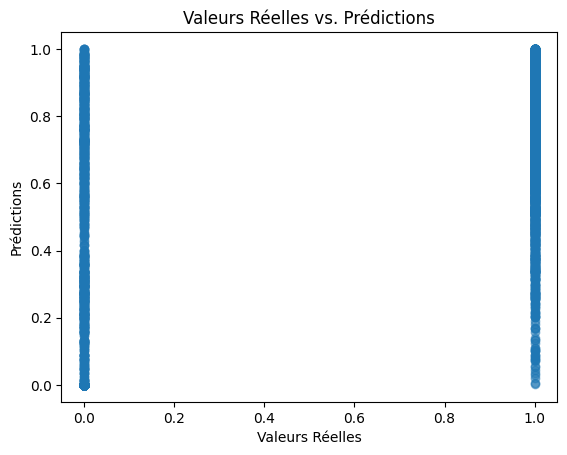

In [295]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Valeurs Réelles')
plt.ylabel('Prédictions')
plt.title('Valeurs Réelles vs. Prédictions')
plt.show()

In [118]:
from sklearn.metrics import roc_auc_score
# Calcul de l'AUC
auc = roc_auc_score(y_test, y_pred)
print(f"AUC: {auc}")

AUC: 0.9063250516434037


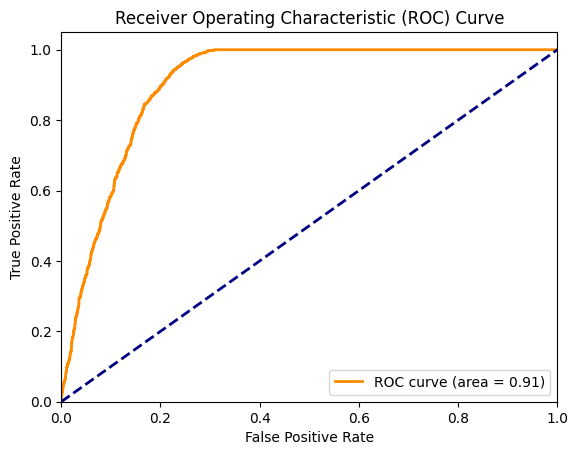

In [119]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
# Compute ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [137]:
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, StackingClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import SVC
# Définir les modèles de base
base_learners = [
                 ('gb', GradientBoostingClassifier(n_estimators=2500,learning_rate=0.1,random_state=42)),
                 ('svc', SVC(kernel='sigmoid', probability=True, random_state=42)),
                 ('rfr', RandomForestRegressor(n_estimators=2000,max_features=75,max_depth=25,min_samples_split=10, min_samples_leaf=4,random_state=42,bootstrap=False))]

# Définir le méta-apprenant
meta_learner = GradientBoostingClassifier(random_state=42)

# Créer le modèle empilé
# Utiliser un objet de validation croisée
cv_strategy = StratifiedKFold(n_splits=5)
stacking_model = StackingClassifier(estimators=base_learners, final_estimator=meta_learner, cv=cv_strategy)
stacking_model.fit(X_train, y_train)

# Prédire sur l'ensemble de test
y_pred_stacking = stacking_model.predict_proba(X_test)[:, 1]

# Calculer l'AUC
auc_stacking = roc_auc_score(y_test, y_pred_stacking)
print(f"AUC avec Stacking: {auc_stacking}")

KeyboardInterrupt: 

In [129]:
selected_features

['Connexion_GVA',
 'Connexion_Togocom',
 'H08_Impute_Electricité (CEET) compteur dans la concession',
 'H18E',
 'H09_Impute_Gaz',
 'H18C',
 'H18D',
 ' .3140',
 'H18H',
 ' .1862',
 'H17F',
 'TypeLogmt_1_Logement moderne',
 'H18A',
 'H20C',
 ' .764',
 ' .737',
 ' .1759',
 ' .3935',
 ' .37',
 'H18B',
 ' .3702',
 ' .1598',
 ' .917',
 'H18G',
 'TypeLogmt_3_Logement à plusieurs niveaux (à étage)',
 ' .3512',
 ' .3560',
 ' .647',
 ' .897',
 ' .3782',
 ' .3795',
 ' .485',
 'H21D',
 ' .580',
 ' .3168',
 ' .3961',
 ' .3209',
 'H18F',
 'TypeLogmt_2_Logement unique',
 ' .3322',
 'H18I',
 ' .452',
 ' .1551',
 ' .3807',
 ' .3825',
 ' .2935',
 ' .2195',
 ' .212',
 'H17B',
 ' .3922',
 ' .1308',
 ' .3669',
 ' .2189',
 ' .1897',
 ' .127',
 ' .1496',
 'H20E',
 ' .1580',
 ' .2880',
 ' .2719',
 ' .1475',
 'H18J',
 ' .3759',
 ' .1275',
 ' .2168',
 ' .2971',
 ' .2492',
 ' .2825',
 ' .3241',
 ' .2017',
 ' .3921',
 ' .2379',
 'H20D',
 ' .2453',
 ' .3316',
 ' .3831',
 ' .2560',
 ' .2007',
 ' .3272',
 ' .3347',


In [122]:
selected_features.remove('Target')

In [123]:
selected_features

['Connexion_GVA',
 'Connexion_Togocom',
 'H08_Impute_Electricité (CEET) compteur dans la concession',
 'H18E',
 'H09_Impute_Gaz',
 'H18C',
 'H18D',
 ' .3140',
 'H18H',
 ' .1862',
 'H17F',
 'TypeLogmt_1_Logement moderne',
 'H18A',
 'H20C',
 ' .764',
 ' .737',
 ' .1759',
 ' .3935',
 ' .37',
 'H18B',
 ' .3702',
 ' .1598',
 ' .917',
 'H18G',
 'TypeLogmt_3_Logement à plusieurs niveaux (à étage)',
 ' .3512',
 ' .3560',
 ' .647',
 ' .897',
 ' .3782',
 ' .3795',
 ' .485',
 'H21D',
 ' .580',
 ' .3168',
 ' .3961',
 ' .3209',
 'H18F',
 'TypeLogmt_2_Logement unique',
 ' .3322',
 'H18I',
 ' .452',
 ' .1551',
 ' .3807',
 ' .3825',
 ' .2935',
 ' .2195',
 ' .212',
 'H17B',
 ' .3922',
 ' .1308',
 ' .3669',
 ' .2189',
 ' .1897',
 ' .127',
 ' .1496',
 'H20E',
 ' .1580',
 ' .2880',
 ' .2719',
 ' .1475',
 'H18J',
 ' .3759',
 ' .1275',
 ' .2168',
 ' .2971',
 ' .2492',
 ' .2825',
 ' .3241',
 ' .2017',
 ' .3921',
 ' .2379',
 'H20D',
 ' .2453',
 ' .3316',
 ' .3831',
 ' .2560',
 ' .2007',
 ' .3272',
 ' .3347',


In [124]:
test_selected = test_encoded[selected_features]

In [125]:
# Standardiser les données de test
X_test_scaled = scaler.transform(test_selected)


In [130]:

# Prédire sur les données de test
y_submit = stacking_model.predict_proba(X_test_scaled)[:, 1]



In [131]:
# Créer un DataFrame pour la soumission
submission = pd.DataFrame({'ID': ID_test, 'Target': y_submit})

# Sauvegarder le fichier de soumission
submission.to_csv('submission8.csv', index=False)

In [132]:
# Initialize the SVM classifier with RBF kernel
from sklearn.metrics import classification_report, confusion_matrix


svm_rbf = SVC(kernel='rbf', probability=True, random_state=42)

# Fit the model to the training data
svm_rbf.fit(X_train, y_train)

# Make predictions on the test data
y_pred_rbf = svm_rbf.predict(X_test)
y_pred_proba_rbf = svm_rbf.predict_proba(X_test)[:, 1]

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred_rbf))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rbf))

# Calculate AUC
auc_rbf = roc_auc_score(y_test, y_pred_proba_rbf)
print(f"AUC: {auc_rbf:.4f}")

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.70      0.82      3115
           1       0.76      1.00      0.86      2997

    accuracy                           0.85      6112
   macro avg       0.88      0.85      0.84      6112
weighted avg       0.88      0.85      0.84      6112

Confusion Matrix:
[[2185  930]
 [  13 2984]]
AUC: 0.8780


In [133]:
from sklearn.ensemble import RandomForestClassifier

# Initialiser et entraîner le modèle de Forêt Aléatoire
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Obtenir les importances des caractéristiques
importances = model.feature_importances_

# Créer un DataFrame pour les importances
feature_importances = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Sélectionner les 30 variables les plus importantes
top_features = feature_importances.head(30)['Feature'].tolist()


AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [291]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier


model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train, y_train)
ypred = model_rf.predict(X_test)
# Évaluer les performances du modèle
accuracy_final = accuracy_score(y_test, ypred)
print(f'Précision globale : {accuracy_final:.2f}')
print('Rapport de classification :')
print(classification_report(y_test, ypred))


Précision globale : 0.86
Rapport de classification :
              precision    recall  f1-score   support

           0       0.89      0.82      0.86      3115
           1       0.83      0.90      0.86      2997

    accuracy                           0.86      6112
   macro avg       0.86      0.86      0.86      6112
weighted avg       0.86      0.86      0.86      6112



ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [292]:

# Matrice de confusion
conf_matrix_final = confusion_matrix(y_test, ypred)
print('Matrice de confusion :')
print(conf_matrix_final)

Matrice de confusion :
[[2566  549]
 [ 310 2687]]


In [322]:
selected_features

['Connexion_GVA',
 'Connexion_Togocom',
 'H08_Impute_Electricité (CEET) compteur dans la concession',
 'H18E',
 'H09_Impute_Gaz',
 'H18C',
 'H18D',
 ' .3140',
 'H18H',
 ' .1862',
 'H17F',
 'TypeLogmt_1_Logement moderne',
 'H18A',
 'H20C',
 ' .764',
 ' .737',
 ' .1759',
 ' .3935',
 ' .37',
 'H18B',
 ' .3702',
 ' .1598',
 ' .917',
 'H18G',
 'TypeLogmt_3_Logement à plusieurs niveaux (à étage)',
 ' .3512',
 ' .3560',
 ' .647',
 ' .897',
 ' .3782',
 ' .3795',
 ' .485',
 'H21D',
 ' .580',
 ' .3168',
 ' .3961',
 ' .3209',
 'H18F',
 'TypeLogmt_2_Logement unique',
 ' .3322',
 'H18I',
 ' .452',
 ' .1551',
 ' .3807',
 ' .3825',
 ' .2935',
 ' .2195',
 ' .212',
 'H17B',
 ' .3922',
 ' .1308',
 ' .3669',
 ' .2189',
 ' .1897',
 ' .127',
 ' .1496',
 'H20E',
 ' .1580',
 ' .2880',
 ' .2719',
 ' .1475',
 'H18J',
 ' .3759',
 ' .1275',
 ' .2168',
 ' .2971',
 ' .2492',
 ' .2825',
 ' .3241',
 ' .2017',
 ' .3921',
 ' .2379',
 'H20D',
 ' .2453',
 ' .3316',
 ' .3831',
 ' .2560',
 ' .2007',
 ' .3272',
 ' .3347',


In [ ]:
selected_features.remove('Target')
selected_features

In [323]:
test_selected = test_encoded[selected_features]

In [324]:
# Normalisation des données
test_scaled = scaler.fit_transform(test_selected)

In [201]:
# Créer un nouveau DataFrame avec les 30 variables les plus corrélées et la variable cible
X_top_100 = df_encoded[top_30_features]
y = df_encoded['Target']

In [202]:
X_top_30 = X_top_100.drop(['Target'], axis=1)
X_top_30

,Connexion_GVA,Connexion_Togocom,H08_Impute_Electricité (CEET) compteur dans la concession,H18E,H09_Impute_Gaz,H18C,H18D,.3140,H18H,.1862,...,.800,.2682,.3274,.2759,.3007,.2584,.2424,.2364,.282,.2593
0,1.0,0.0,1.0,False,1.0,False,False,0.001653,False,0.000054,...,0.007847,1.108901,1.051830,0.005690,0.000002,1.086575,0.806246,0.843692,0.008772,0.985466
1,1.0,0.0,1.0,True,1.0,False,False,0.000007,False,0.001677,...,0.016320,0.473999,0.142159,0.650879,0.039244,0.143422,0.250238,0.185246,0.010324,0.268238
2,1.0,0.0,1.0,False,0.0,False,False,0.000001,False,0.000182,...,0.199693,1.272892,1.095986,0.015391,0.000000,1.265169,0.921966,0.972012,0.151624,1.093892
3,0.0,1.0,1.0,True,1.0,True,True,0.000823,False,0.000478,...,0.121874,1.186848,1.129970,0.021986,0.000006,1.136310,0.821372,0.886258,0.091038,0.995068
4,0.0,0.0,1.0,False,0.0,False,False,0.000004,False,0.000140,...,0.195623,1.283996,1.158646,0.016978,0.000117,1.266848,0.915049,0.967240,0.144863,1.030560
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30553,0.0,1.0,1.0,True,0.0,False,False,0.001653,False,0.000054,...,0.007847,1.108901,1.051830,0.005690,0.000002,1.086575,0.806246,0.843692,0.008772,0.985466
30554,0.0,1.0,1.0,False,0.0,False,False,0.000009,False,0.000000,...,0.000100,1.395532,1.136671,0.013739,0.000000,1.348983,0.942796,1.065834,0.000087,1.102971
30555,0.0,1.0,1.0,False,1.0,False,True,0.000004,True,0.000140,...,0.195623,1.283996,1.158646,0.016978,0.000117,1.266848,0.915049,0.967240,0.144863,1.030560
30556,1.0,0.0,1.0,True,1.0,True,True,0.001011,True,0.000012,...,0.000067,1.507143,1.789787,0.575998,0.001878,1.441566,1.112720,1.136713,0.000091,1.250213


In [203]:
# Diviser les données en ensembles d'entraînement et de test
from sklearn.model_selection import train_test_split


X_train_top_30, X_test_top_30, y_train, y_test = train_test_split(X_top_30, y, test_size=0.3, random_state=42)

In [204]:
# Initialiser et entraîner le modèle Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


rf_clf_top_30 = RandomForestClassifier(n_estimators=500,max_features=75,max_depth=20,random_state=42)


In [205]:
rf_clf_top_30.fit(X_train_top_30, y_train)


RandomForestClassifier(max_depth=20, max_features=75, n_estimators=500,
                       random_state=42)

In [206]:

# Prédictions
y_pred_rf_top_30 = rf_clf_top_30.predict(X_test_top_30)


In [207]:

# Évaluer les performances
accuracy_top_30 = accuracy_score(y_test, y_pred_rf_top_30)
print(f'Précision globale avec les 30 variables les plus corrélées : {accuracy_top_30:.2f}')


Précision globale avec les 30 variables les plus corrélées : 0.87


In [208]:

# Rapport de classification
print(classification_report(y_test, y_pred_rf_top_30))

# Matrice de confusion
conf_matrix_top_30 = confusion_matrix(y_test, y_pred_rf_top_30)
print(conf_matrix_top_30)


              precision    recall  f1-score   support

           0       0.94      0.80      0.86      4625
           1       0.82      0.95      0.88      4543

    accuracy                           0.87      9168
   macro avg       0.88      0.87      0.87      9168
weighted avg       0.88      0.87      0.87      9168

[[3696  929]
 [ 232 4311]]


In [172]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Configuration du modèle avec les hyperparamètres spécifiés
rf_model_optimized = RandomForestClassifier(
    n_estimators=500,
    max_features='log2',
    max_depth=20,
    min_samples_split=10,
    min_samples_leaf=4,
    bootstrap=True,
    random_state=42
)


In [173]:

# Entraînement du modèle sur les données d'entraînement
rf_model_optimized.fit(X_train_top_30, y_train)

# Prédiction sur les données de test
y_pred_rf_optimized = rf_model_optimized.predict(X_test_top_30)


In [174]:

# Évaluation du modèle optimzer
accuracy_optimized = accuracy_score(y_test, y_pred_rf_optimized)
print(f'Précision globale : {accuracy_optimized:.2f}')

print("Rapport de classification :")
print(classification_report(y_test, y_pred_rf_optimized))

# Matrice de confusion
conf_matrix_optimized = confusion_matrix(y_test, y_pred_rf_optimized)
print("Matrice de confusion :")
print(conf_matrix_optimized)


Précision globale : 0.81
Rapport de classification :
              precision    recall  f1-score   support

           0       0.86      0.74      0.80      4625
           1       0.77      0.88      0.82      4543

    accuracy                           0.81      9168
   macro avg       0.81      0.81      0.81      9168
weighted avg       0.82      0.81      0.81      9168

Matrice de confusion :
[[3430 1195]
 [ 557 3986]]


In [24]:
cor_list = correlation_target.head(30).__dict__
cor_list

{'_is_copy': None,
 '_mgr': SingleBlockManager
 Items: Index(['Target', 'Connexion_GVA', 'Connexion_Togocom',
        'H08_Impute_Electricité (CEET) compteur dans la concession', 'H18E',
        'H09_Impute_Gaz', 'H18C', 'H18D', ' .3140', 'H18H', ' .1862', 'H17F',
        'TypeLogmt_1_Logement moderne', 'H18A', 'H20C', ' .764', ' .737',
        ' .1759', ' .3935', ' .37', 'H18B', ' .3702', ' .1598', ' .917', 'H18G',
        'TypeLogmt_3_Logement à plusieurs niveaux (à étage)', ' .3512',
        ' .3560', ' .647', ' .897'],
       dtype='object')
 NumpyBlock: 30 dtype: float64,
 '_item_cache': {},
 '_attrs': {},
 '_flags': <Flags(allows_duplicate_labels=True)>,
 '_name': 'Target'}

In [25]:

# Sélection des variables les plus corrélées
corr_vars = [
    'Connexion_GVA', 'Connexion_Togocom', 'H08_Impute_Electricité (CEET) compteur dans la concession', 
    'H18E', 'H09_Impute_Gaz', 'H18C', 'H18D', ' .3140', 'H18H', ' .1862', 
    'H17F', 'TypeLogmt_1_Logement moderne', 'H18A', 'H20C', ' .764', 
    ' .737', ' .1759', ' .3935', ' .37', 'H18B', ' .3702', ' .1598', ' .917', 'H18G',
        'TypeLogmt_3_Logement à plusieurs niveaux (à étage)', ' .3512',
        ' .3560', ' .647', ' .897', 'Target'
]


In [26]:

# Filtrer le DataFrame
df_corr = df_encoded[corr_vars].corr()


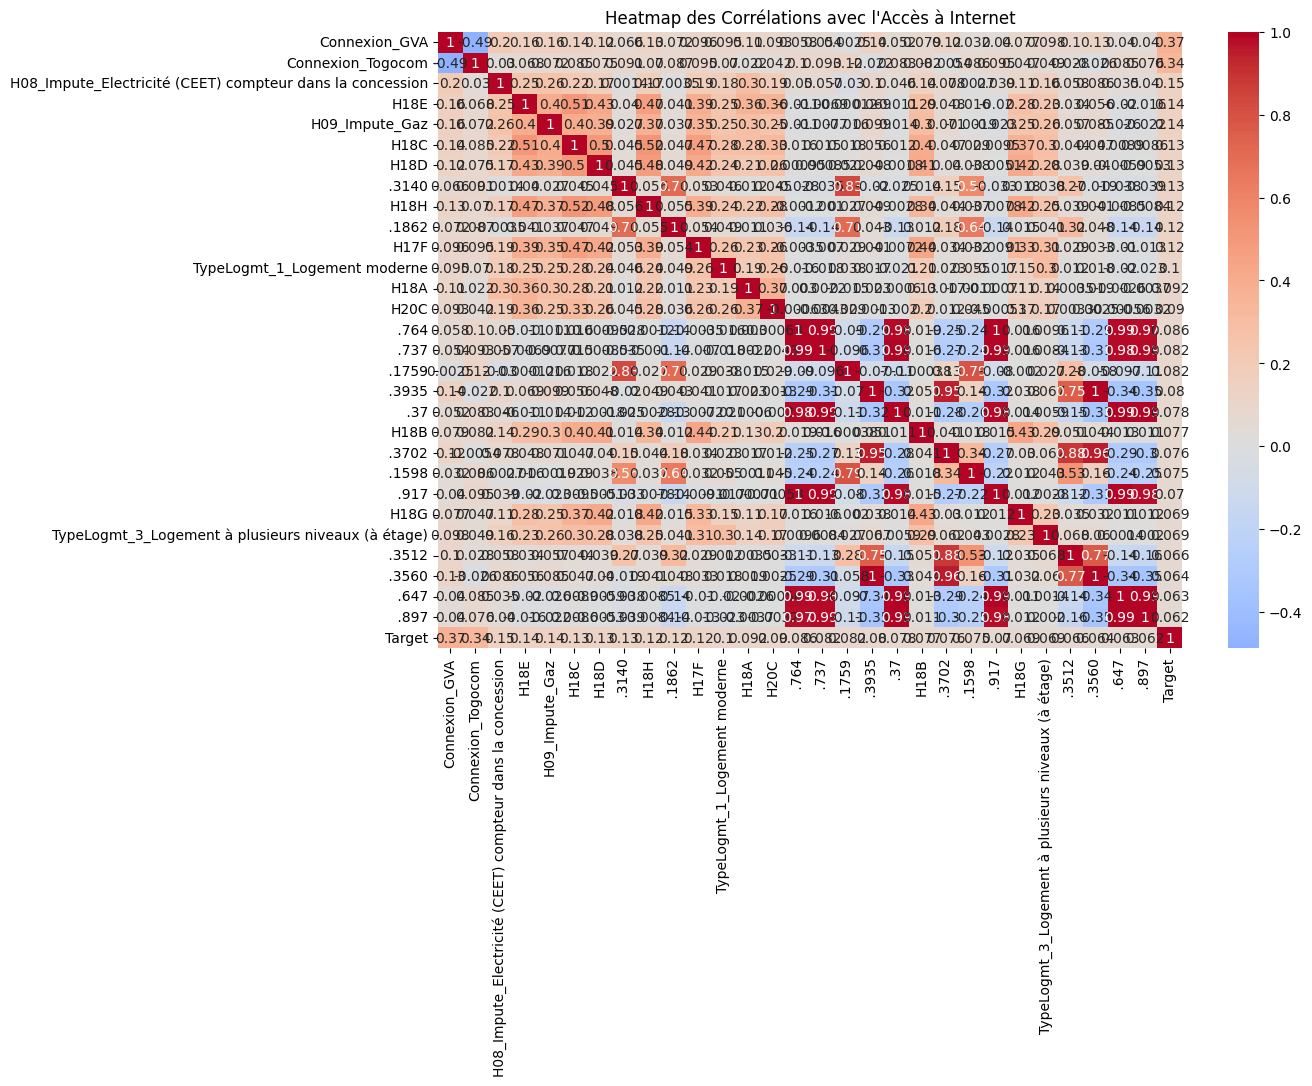

In [27]:

# Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df_corr, annot=True, cmap='coolwarm', center=0)
plt.title('Heatmap des Corrélations avec l\'Accès à Internet')
plt.show()

In [48]:
# Connexion_GVA
print(df_encoded['Connexion_GVA'].describe())

count    30558.000000
mean         0.340991
std          0.474050
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: Connexion_GVA, dtype: float64


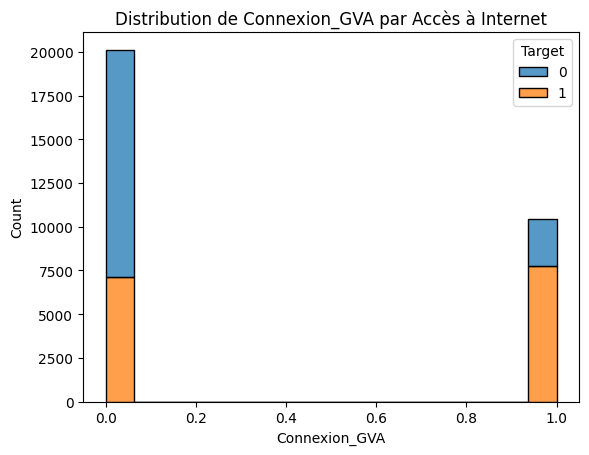

In [55]:
#plot de connexon gva
sns.histplot(df_encoded, x='Connexion_GVA', hue='Target', multiple='stack')
plt.title('Distribution de Connexion_GVA par Accès à Internet')
plt.show()


In [56]:

# Connexion_Togocom
print(df_encoded['Connexion_Togocom'].describe())


count    30558.000000
mean         0.315138
std          0.464579
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: Connexion_Togocom, dtype: float64


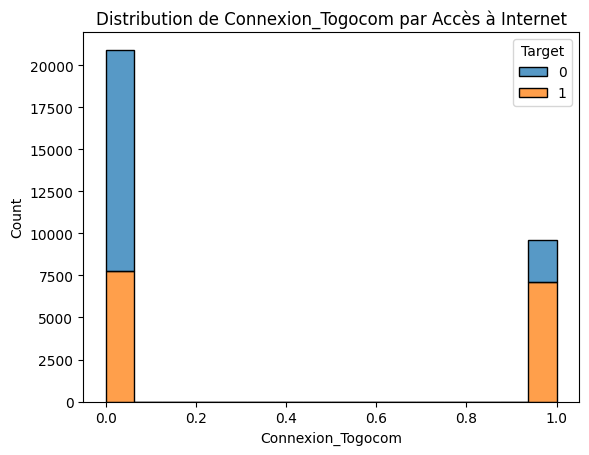

In [57]:
sns.histplot(df_encoded, x='Connexion_Togocom', hue='Target', multiple='stack')
plt.title('Distribution de Connexion_Togocom par Accès à Internet')
plt.show()


In [62]:

corr_vars = [
    'Connexion_GVA', 'Connexion_Togocom', 'H08_Impute_Electricité (CEET) compteur dans la concession', 
    'H18E', 'H09_Impute_Gaz', 'H18C', 'H18D', ' .3140', 'H18H', ' .1862', 
    'H17F', 'TypeLogmt_1_Logement moderne', 'H18A', 'H20C', ' .764', 
    ' .737', ' .1759', ' .3935', ' .37', 'H18B', ' .3702', ' .1598', ' .917', 'H18G',
        'TypeLogmt_3_Logement à plusieurs niveaux (à étage)', ' .3512',
        ' .3560', ' .647', ' .897', 'Target'
]

In [58]:
# H08_Impute_Electricité (CEET) compteur dans la concession
print(df_encoded['H08_Impute_Electricité (CEET) compteur dans la concession'].describe())


count    30558.000000
mean         0.786701
std          0.409644
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: H08_Impute_Electricité (CEET) compteur dans la concession, dtype: float64


In [28]:
df_encoded.shape

(30558, 4067)

In [60]:

print(df_encoded['H18E'].describe())

count     30558
unique        2
top       False
freq      19807
Name: H18E, dtype: object


In [71]:
from sklearn.tree import DecisionTreeClassifier

In [36]:

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score, confusion_matrix


In [30]:
df_encoded.shape

(30558, 4067)

In [ ]:

# Préparation des données
X = df_encoded[corr_vars[:-1]]  # toutes les variables sauf la cible
y = df_encoded['Target']  # variable cible

In [64]:

# Division en ensemble d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [65]:

# Modèle Décision TREE
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [69]:
# MODÈLE RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier

#initialize the model
rf = RandomForestClassifier(n_estimators=100,random_state=42)

#train the model
rf.fit(X_train,y_train)

#predictions
y_pred_rf = rf.predict(X_test)

In [72]:
# Rapport de classification
print(classification_report(y_test, y_pred_rf))

# Précision globale
accuracy = accuracy_score(y_test, y_pred_rf)
print(f'Précision globale : {accuracy:.2f}')


              precision    recall  f1-score   support

           0       0.86      0.80      0.83      4625
           1       0.81      0.87      0.84      4543

    accuracy                           0.84      9168
   macro avg       0.84      0.84      0.84      9168
weighted avg       0.84      0.84      0.84      9168

Précision globale : 0.84


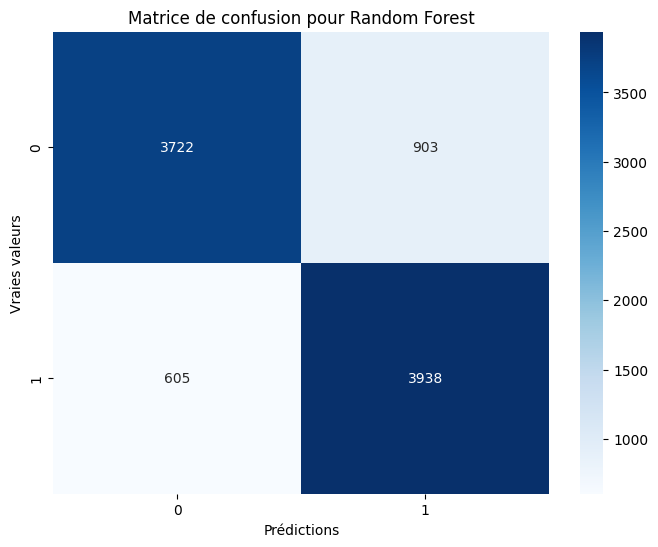

In [73]:

# Matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred_rf)

# Visualisation de la matrice de confusion
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Prédictions')
plt.ylabel('Vraies valeurs')
plt.title('Matrice de confusion pour Random Forest')
plt.show()


In [74]:
conf_matrix



array([[3722,  903],
       [ 605, 3938]], dtype=int64)

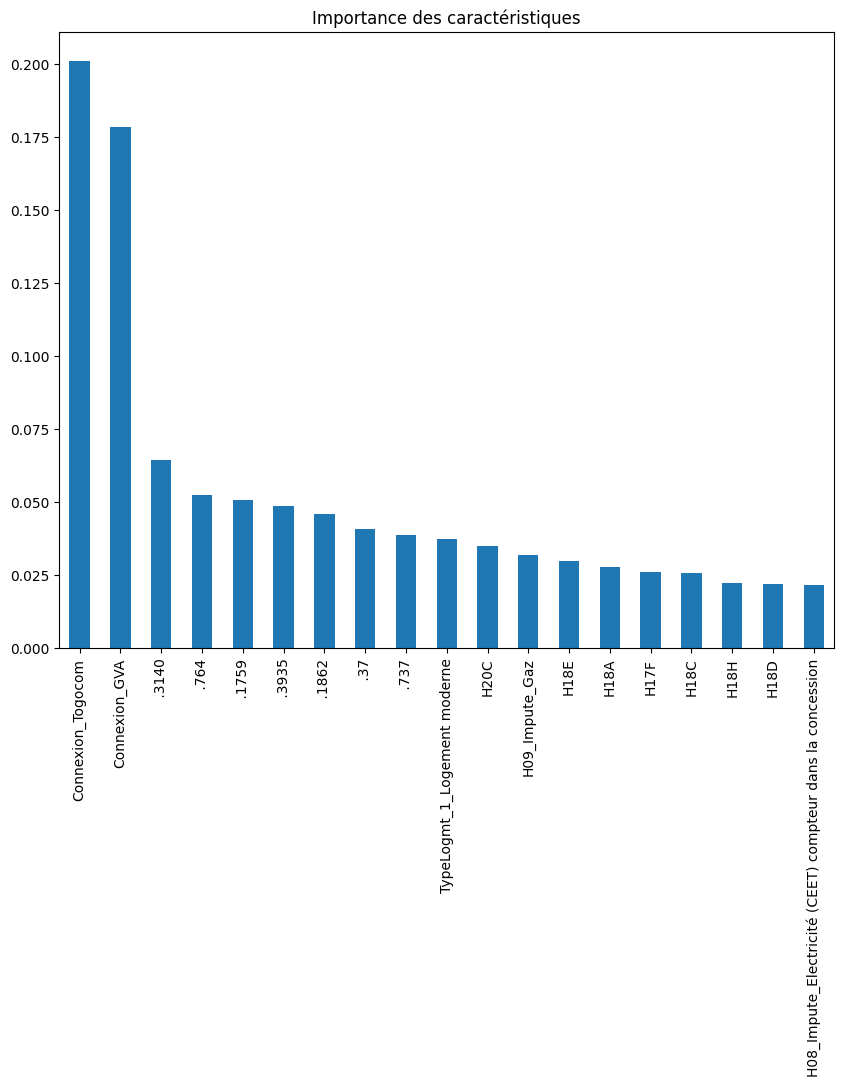

In [75]:
# Importance des caractéristiques
importances = rf.feature_importances_
feature_importance = pd.Series(importances, index=X.columns)

# Visualiser les 20 caractéristiques les plus importantes
top_features = feature_importance.sort_values(ascending=False).head(20)
plt.figure(figsize=(10, 8))
top_features.plot(kind='bar')
plt.title('Importance des caractéristiques')
plt.show()


In [78]:
feature_importance.to_numpy()

array([0.17842675, 0.20092924, 0.02165398, 0.02992698, 0.03181784,
       0.02578224, 0.02185242, 0.06425269, 0.02237199, 0.04599255,
       0.02588143, 0.0374553 , 0.02775745, 0.03504366, 0.05249342,
       0.03854493, 0.05054229, 0.04847845, 0.04079641])

In [77]:
importances

array([0.17842675, 0.20092924, 0.02165398, 0.02992698, 0.03181784,
       0.02578224, 0.02185242, 0.06425269, 0.02237199, 0.04599255,
       0.02588143, 0.0374553 , 0.02775745, 0.03504366, 0.05249342,
       0.03854493, 0.05054229, 0.04847845, 0.04079641])

In [76]:
from sklearn.model_selection import cross_val_score

# Évaluation par validation croisée
cv_scores = cross_val_score(rf, X, y, cv=5)
print(f'Scores de validation croisée : {cv_scores}')
print(f'Moyenne des scores de validation croisée : {cv_scores.mean():.2f}')


Scores de validation croisée : [0.83507853 0.84473168 0.83393325 0.84421535 0.83717886]
Moyenne des scores de validation croisée : 0.84


In [79]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Définir les hyperparamètres à optimiser
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialiser le modèle Random Forest
rf_clf = RandomForestClassifier(random_state=42)

# Configurer GridSearchCV
grid_search = GridSearchCV(estimator=rf_clf, param_grid=param_grid,
                           cv=3, n_jobs=-1, verbose=2, scoring='accuracy')

# Exécuter la recherche
grid_search.fit(X_train, y_train)

# Meilleurs hyperparamètres trouvés
best_params = grid_search.best_params_
print(f'Les meilleurs hyperparamètres sont : {best_params}')

# Meilleur modèle optimisé
best_rf_clf = grid_search.best_estimator_

# Prédictions et évaluation du modèle optimisé
y_pred_best_rf = best_rf_clf.predict(X_test)

# Évaluer les performances du modèle optimisé
accuracy_best_rf = accuracy_score(y_test, y_pred_best_rf)
print(f'Précision globale du modèle optimisé : {accuracy_best_rf:.2f}')

# Rapport de classification pour le modèle optimisé
print(classification_report(y_test, y_pred_best_rf))

# Matrice de confusion pour le modèle optimisé
conf_matrix_best_rf = confusion_matrix(y_test, y_pred_best_rf)
print(conf_matrix_best_rf)


Fitting 3 folds for each of 648 candidates, totalling 1944 fits


In [66]:
# Prédictions
y_pred = clf.predict(X_test)

In [67]:
# Rapport de classification
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.84      0.80      4625
           1       0.82      0.74      0.78      4543

    accuracy                           0.79      9168
   macro avg       0.79      0.79      0.79      9168
weighted avg       0.79      0.79      0.79      9168



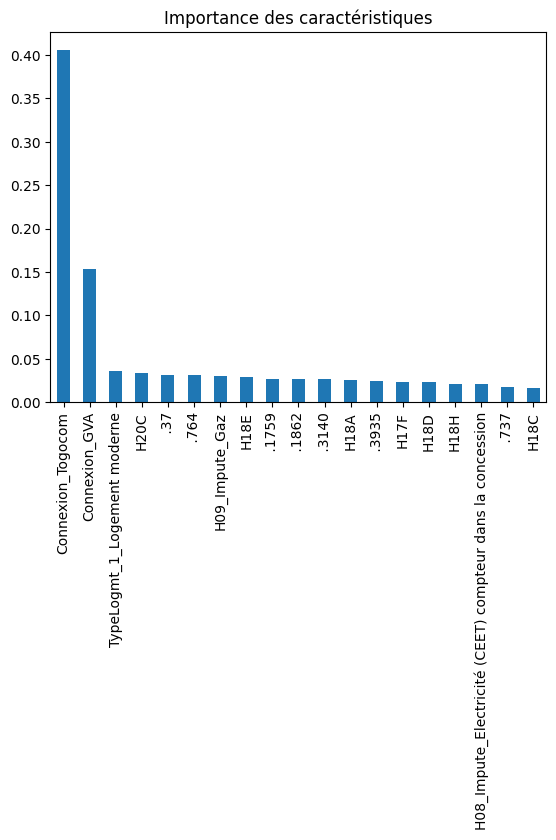

In [68]:

# Importances des caractéristiques
importances = clf.feature_importances_
feature_importance = pd.Series(importances, index=X.columns)
feature_importance.sort_values(ascending=False).plot(kind='bar')
plt.title('Importance des caractéristiques')
plt.show()


In [81]:
df_encoded = df_encoded.drop(columns=['Target'])

PCA


In [85]:
from sklearn.preprocessing import StandardScaler

# Normaliser les données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_encoded)


Variance expliquée par les composantes principales : [0.63206648 0.13555444 0.12445206 0.02525691 0.01444127 0.01188133
 0.00689669 0.0058945  0.00455629 0.00327307]


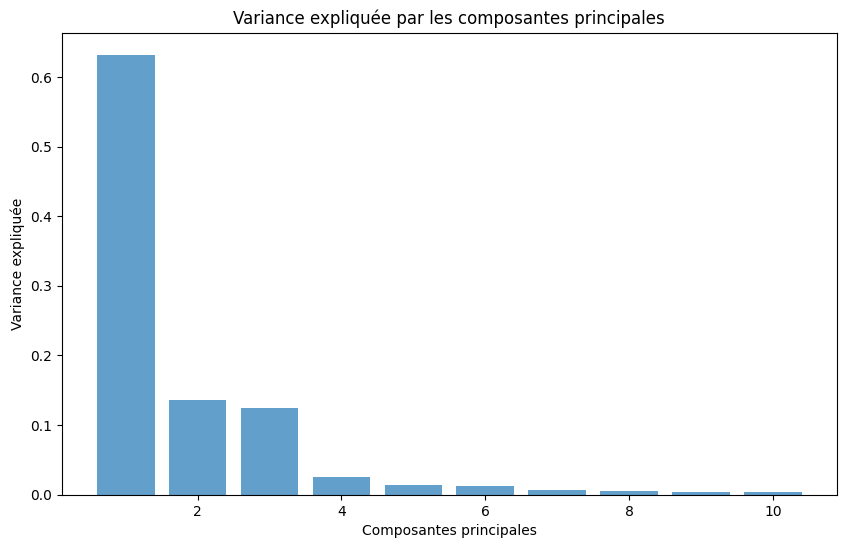

In [86]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Réaliser le PCA
pca = PCA(n_components=10)  # Vous pouvez ajuster le nombre de composantes
X_pca = pca.fit_transform(X_scaled)

# Variance expliquée par les composantes principales
explained_variance = pca.explained_variance_ratio_
print(f'Variance expliquée par les composantes principales : {explained_variance}')

# Plot des composantes principales
plt.figure(figsize=(10, 6))
plt.bar(range(1, 11), explained_variance, alpha=0.7, align='center')
plt.xlabel('Composantes principales')
plt.ylabel('Variance expliquée')
plt.title('Variance expliquée par les composantes principales')
plt.show()


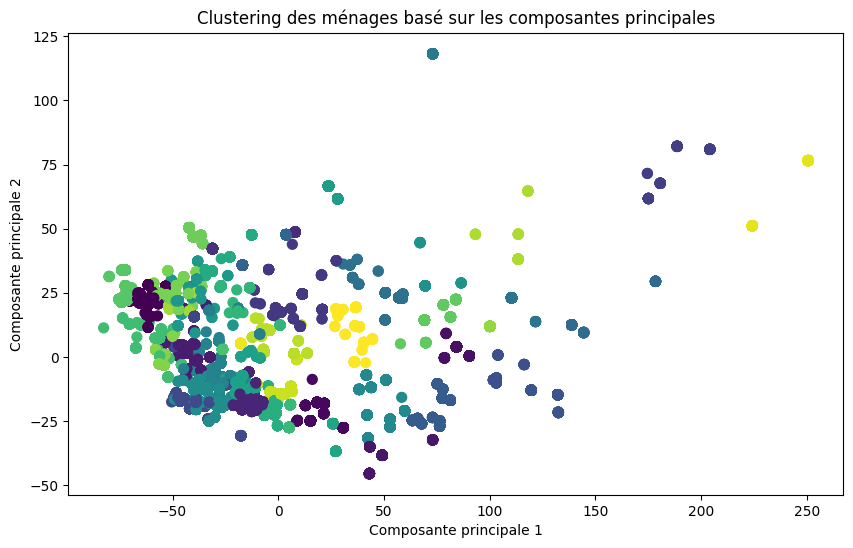

In [114]:
from sklearn.cluster import KMeans

# Réaliser le clustering K-means
kmeans = KMeans(n_clusters=50, random_state=42)  # Vous pouvez ajuster le nombre de clusters
clusters = kmeans.fit_predict(X_pca)

# Ajouter les clusters au DataFrame original
df_encoded['Cluster'] = clusters

# Visualisation des clusters
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', s=50)
plt.xlabel('Composante principale 1')
plt.ylabel('Composante principale 2')
plt.title('Clustering des ménages basé sur les composantes principales')
plt.show()


In [115]:
df_encoded['Cluster']

0        35
1         7
2         5
3        28
4         5
         ..
30553    35
30554    11
30555     5
30556    33
30557    24
Name: Cluster, Length: 30558, dtype: int32

In [116]:
# Variables influentes
influential_vars = [df_encoded.columns[i] for i in pca.components_[0].argsort()[-50:]]
print("Variables influentes : ", influential_vars)

Variables influentes :  [' .2421', ' .3928', ' .2440', ' .2940', ' .2280', ' .2618', ' .2131', ' .2543', ' .2441', ' .2063', ' .2105', ' .2194', ' .2244', ' .2930', ' .2023', ' .2917', ' .2715', ' .2799', ' .2638', ' .2758', ' .2510', ' .3455', ' .2653', ' .2186', ' .2735', ' .2102', ' .2352', ' .2787', ' .2262', ' .2871', ' .2423', ' .2478', ' .2133', ' .2446', ' .2599', ' .2905', ' .2415', ' .2375', ' .2699', ' .2836', ' .2890', ' .2012', ' .2160', ' .2882', ' .2692', ' .2080', ' .2493', ' .2587', ' .2062', ' .2248']


In [94]:
# Variables non influentes
non_influential_vars = [df_encoded.columns[i] for i in pca.components_[0].argsort()[:10]]

In [117]:
# Combiner les variables influentes et non influentes
selected_vars = influential_vars 

# Créer le nouveau DataFrame avec les variables sélectionnées
df_selected_final = df_encoded[selected_vars + ['Target']]

# Séparer les données en ensembles d'entraînement et de test
X_final = df_selected_final.drop('Target', axis=1)
y_final = df_selected_final['Target']
X_train_final, X_test_final, y_train_final, y_test_final = train_test_split(X_final, y_final, test_size=0.3, random_state=42)

# Entraîner un modèle Random Forest avec les paramètres optimisés
rf_final = RandomForestClassifier(
    n_estimators=500, 
    max_features='sqrt', 
    max_depth=10, 
    min_samples_split=5, 
    min_samples_leaf=2, 
    bootstrap=True,
    random_state=42
)
rf_final.fit(X_train_final, y_train_final)

# Prédictions sur l'ensemble de test
y_pred_rf_final = rf_final.predict(X_test_final)

# Évaluer les performances du modèle
accuracy_final = accuracy_score(y_test_final, y_pred_rf_final)
print(f'Précision globale : {accuracy_final:.2f}')
print('Rapport de classification :')
print(classification_report(y_test_final, y_pred_rf_final))

# Matrice de confusion
conf_matrix_final = confusion_matrix(y_test_final, y_pred_rf_final)
print('Matrice de confusion :')
print(conf_matrix_final)


Précision globale : 0.81
Rapport de classification :
              precision    recall  f1-score   support

           0       0.86      0.74      0.79      4625
           1       0.77      0.88      0.82      4543

    accuracy                           0.81      9168
   macro avg       0.81      0.81      0.80      9168
weighted avg       0.81      0.81      0.80      9168

Matrice de confusion :
[[3403 1222]
 [ 561 3982]]


In [325]:
# Sélectionner les mêmes caractéristiques dans les données de test
X_submit = test_selected


In [309]:
# S'assurer que les colonnes sont dans le même ordre
X_submit = X_submit[X_train.columns]

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [326]:
# Prédire les valeurs cibles sur les données de test
y_submit = model.predict(X_submit)

c:\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


In [327]:
# Supposons que la colonne d'identification dans test_encoded soit 'id'
submission_df = pd.DataFrame({
    'id': ID_test,  # Assurez-vous que l'ID correspond à ce que le concours attend
    'Target': y_submit
})


In [328]:
# Enregistrer le DataFrame sous forme de fichier CSV
submission_df.to_csv('submission4.csv', index=False)


In [329]:
df_encoded

,TAILLE_MENAGE,H17A,H17B,H17C,H17D,H17E,H17F,H17G,H17H,H17I,...,H09_Impute_Bouse d animaux,H09_Impute_Charbon de bois,H09_Impute_Gaz,H09_Impute_Ne cuisine pas,H09_Impute_Pétrole,H09_Impute_Résidus végétaux/sciure de bois,H09_Impute_électricité,Connexion_GVA,Connexion_Togocom,Connexion_inconnu
0,1.0,False,True,False,False,False,False,False,False,False,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,4.0,False,True,False,False,False,False,False,False,False,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.0,False,False,False,False,False,False,False,False,False,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,4.0,False,False,False,False,False,False,False,False,False,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.0,False,False,False,False,False,False,False,False,False,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30553,5.0,True,True,False,False,False,False,False,False,False,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
30554,1.0,False,False,False,False,False,False,False,False,False,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
30555,5.0,False,False,False,False,False,True,False,False,False,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
30556,1.0,False,False,False,False,False,False,False,False,False,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


### PCA 2

In [32]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [33]:
# Colonne 'Target' comme variable cible
target_variable = 'Target'

# Préparer les données pour PCA
X = df_encoded.drop(columns=[target_variable])
y = df_encoded[target_variable]

In [34]:

# Standardiser les données
scaler = StandardScaler()


In [35]:
X_scaled = scaler.fit_transform(X)

In [60]:

# Appliquer PCA
pca = PCA(n_components=20)  


In [61]:
X_pca = pca.fit_transform(X_scaled)

In [62]:

# Afficher la variance expliquée par chaque composant principal
explained_variance = pca.explained_variance_ratio_
print(f'Variance expliquée par chaque composant principal: {explained_variance}')

Variance expliquée par chaque composant principal: [0.63221366 0.13558535 0.12448281 0.02526258 0.01444239 0.0118794
 0.0068919  0.00589232 0.00455218 0.00327372 0.00288102 0.00229991
 0.00171965 0.00150388 0.00143046 0.00110337 0.00091823 0.00087906
 0.00078046 0.00068543]


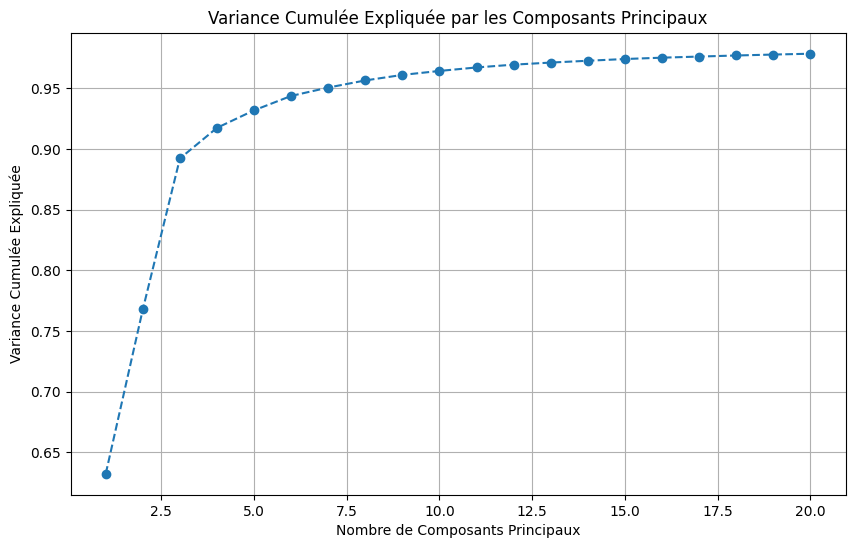

In [63]:

# Visualiser la variance expliquée cumulée
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance.cumsum(), marker='o', linestyle='--')
plt.xlabel('Nombre de Composants Principaux')
plt.ylabel('Variance Cumulée Expliquée')
plt.title('Variance Cumulée Expliquée par les Composants Principaux')
plt.grid()
plt.show()

In [64]:

# Diviser les données en ensembles de formation et de test
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

In [65]:

# Initialiser le modèle
model = RandomForestRegressor(random_state=42)


In [66]:
#entraîner le modèle de régression
model.fit(X_train_pca, y_train)

RandomForestRegressor(random_state=42)

In [67]:

# Prédire sur l'ensemble de test
y_pred_pca = model.predict(X_test_pca)

In [68]:
# Évaluer la performance du modèle (par exemple, Mean Squared Error)
mse_pca = mean_squared_error(y_test, y_pred_pca)
print(f"Mean Squared Error avec PCA: {mse_pca}")

Mean Squared Error avec PCA: 0.1106268545429481


In [69]:

# Calcul de l'AUC
auc_pca = roc_auc_score(y_test, y_pred_pca)
print(f"AUC avec PCA: {auc_pca}")

AUC avec PCA: 0.9043993699424411


In [70]:
# Standardiser les données de test
X_test_scaled = scaler.transform(test_encoded)

In [71]:

# Appliquer PCA sur les données de test
X_test_pca = pca.transform(X_test_scaled)

In [72]:
# Prédire sur les données de test
y_submit = model.predict(X_test_pca)

In [73]:
# Créer un DataFrame pour la soumission
submission = pd.DataFrame({'ID': ID_test, 'Target': y_submit})

# Sauvegarder le fichier de soumission
submission.to_csv('submission6.csv', index=False)